In [80]:
import numpy as np
import pandas as pd
import scanpy as sc
import matplotlib.pyplot as pl
import seaborn as sns
import bbknn
import scvelo as scv
import anndata
import leidenalg
import loompy
from scipy import io
from scipy.sparse import coo_matrix, csr_matrix
from matplotlib.pyplot import rc_context
from matplotlib import cm
from matplotlib.colors import ListedColormap, LinearSegmentedColormap
import os
import random

In [81]:
# Set working directory
os.chdir("P:/Tolulope/Cellranger Results/Fry-Murach 4d OV aged")

In [82]:
adata = sc.read_h5ad('combined1.h5ad')
adata

AnnData object with n_obs × n_vars = 16455 × 19304
    obs: 'doublet', 'n_genes', 'n_genes_by_counts', 'total_counts', 'total_counts_mt', 'pct_counts_mt', 'total_counts_ribo', 'pct_counts_ribo', 'total_counts_hb', 'pct_counts_hb', 'Sample'
    var: 'n_cells'

In [83]:
adata.obs.groupby('Sample').count()

doublet  n_genes  n_genes_by_counts  total_counts  total_counts_mt  \
Sample                                                                       
V1         4382     4382               4382          4382             4382   
V2         3848     3848               3848          3848             3848   
T1         4045     4045               4045          4045             4045   
T2         4180     4180               4180          4180             4180   

        pct_counts_mt  total_counts_ribo  pct_counts_ribo  total_counts_hb  \
Sample                                                                       
V1               4382               4382             4382             4382   
V2               3848               3848             3848             3848   
T1               4045               4045             4045             4045   
T2               4180               4180             4180             4180   

        pct_counts_hb  
Sample                 
V1               4382  
V2               3848  
T1               4045  
T2               4180

In [84]:
adata.layers['counts'] = adata.X.copy()

In [85]:
sc.pp.normalize_total(adata, target_sum = 1e4)
sc.pp.log1p(adata)
adata.raw = adata

In [86]:
adata.obs.head()

doublet  n_genes  n_genes_by_counts  total_counts  \
AAACCCAAGCCTTGAT-1    False     3227               3227       15930.0   
AAACCCAAGTTCCATG-1    False     1454               1454        4036.0   
AAACCCACAGCTATAC-1    False     2264               2264        8052.0   
AAACCCAGTCCTGTCT-1    False     2522               2522       10531.0   
AAACCCAGTTTGGCTA-1    False     2672               2672       13004.0   

                    total_counts_mt  pct_counts_mt  total_counts_ribo  \
AAACCCAAGCCTTGAT-1             69.0       0.433145             3434.0   
AAACCCAAGTTCCATG-1            207.0       5.128840              894.0   
AAACCCACAGCTATAC-1             28.0       0.347740             2119.0   
AAACCCAGTCCTGTCT-1             77.0       0.731175             1998.0   
AAACCCAGTTTGGCTA-1            127.0       0.976623             3549.0   

                    pct_counts_ribo  total_counts_hb  pct_counts_hb Sample  
AAACCCAAGCCTTGAT-1        21.556810             19.0       0.119272     V1  
AAACCCAAGTTCCATG-1        22.150644              0.0       0.000000     V1  
AAACCCACAGCTATAC-1        26.316442              1.0       0.012419     V1  
AAACCCAGTCCTGTCT-1        18.972557              0.0       0.000000     V1  
AAACCCAGTTTGGCTA-1        27.291601              1.0       0.007690     V1

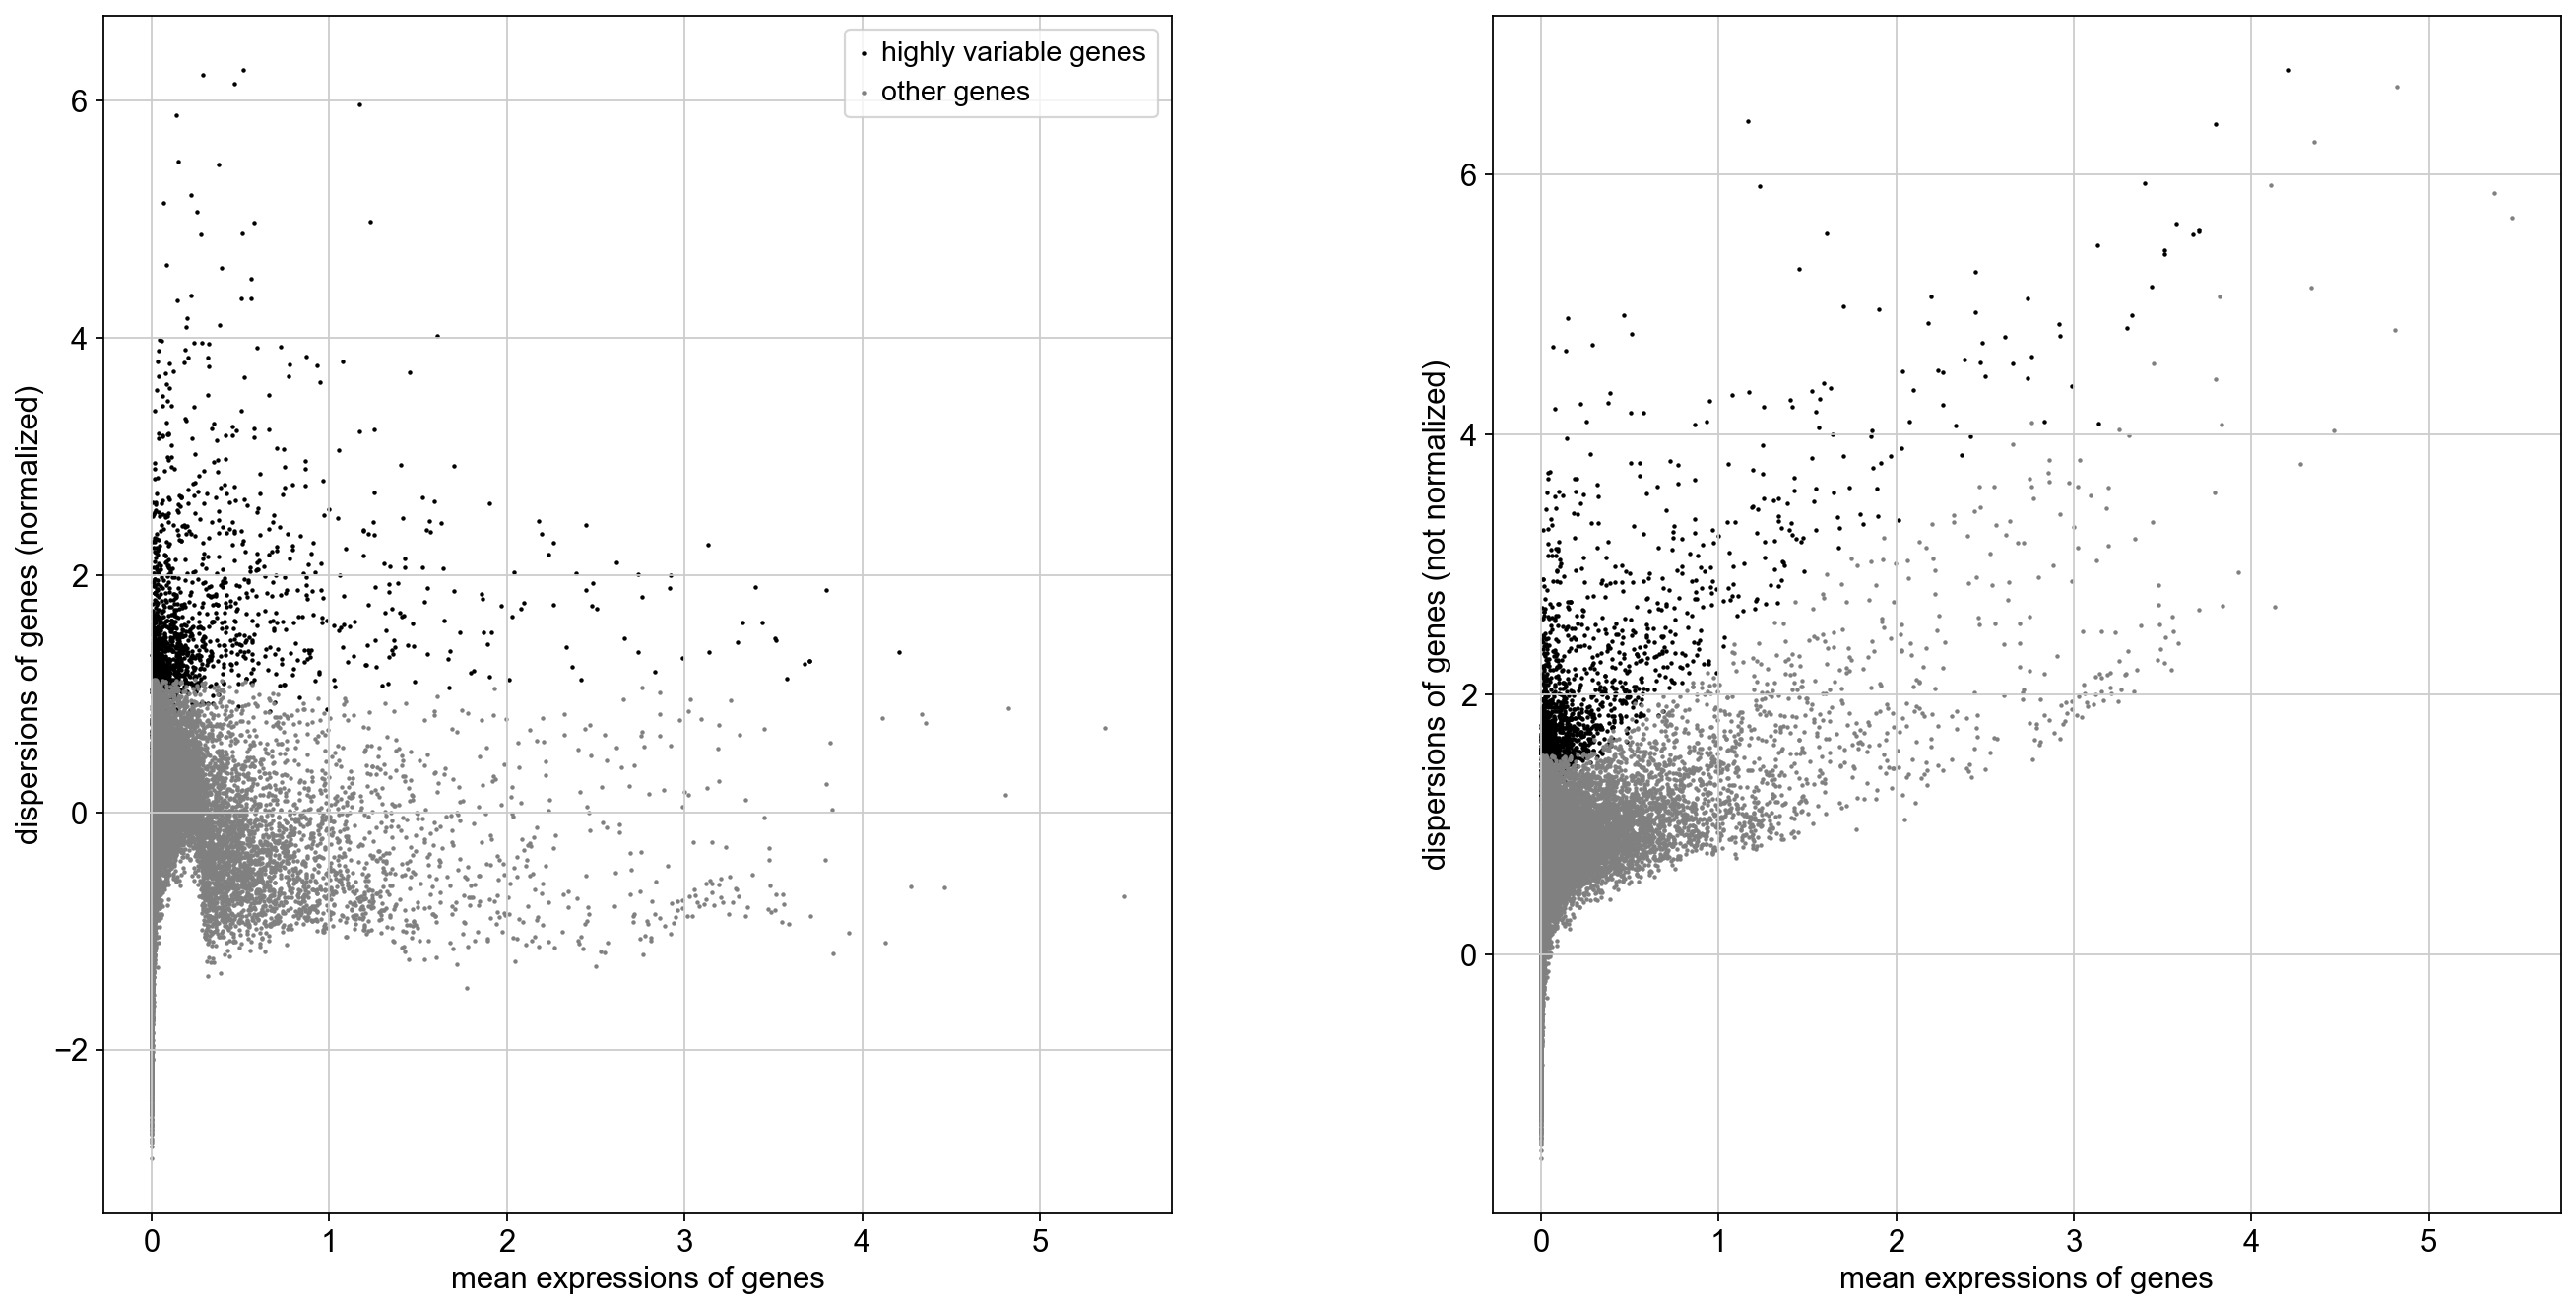

In [87]:
sc.pp.highly_variable_genes(adata, min_mean=0.0125, max_mean=3, min_disp=0.5, n_bins=20, batch_key='Sample', n_top_genes=2000)

sc.pl.highly_variable_genes(adata)#, save=f"{projID}_high_variable_{n3}.png")

In [88]:
sc.pp.scale(adata, max_value=10) 

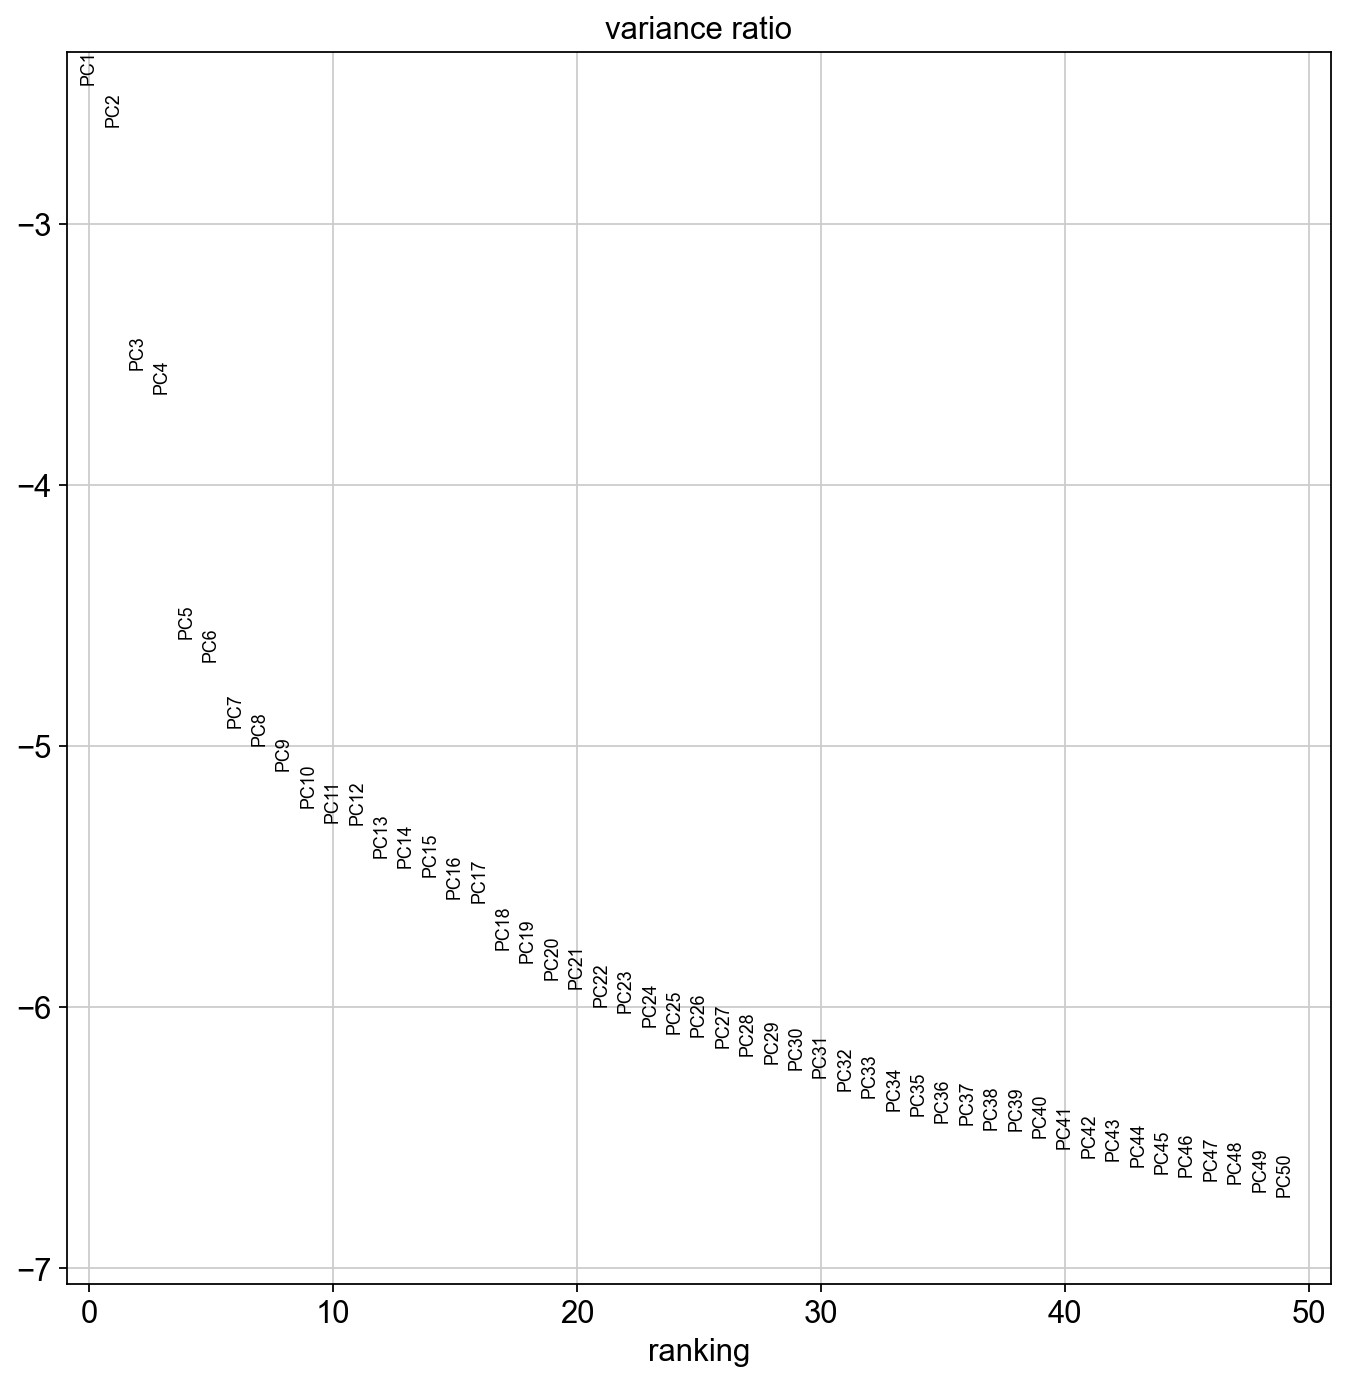

In [89]:
sc.tl.pca(adata, svd_solver='arpack')
# Plot PCA variance ratio
sc.pl.pca_variance_ratio(adata, log=True, n_pcs=50)

In [90]:
sc.pp.neighbors(adata, n_neighbors=35, n_pcs=50)

In [91]:
#BBKNN
bbknn.bbknn(adata, batch_key="Sample")

In [92]:
sc.tl.umap(adata)

In [103]:
sc.tl.leiden(adata, resolution = 0.7)

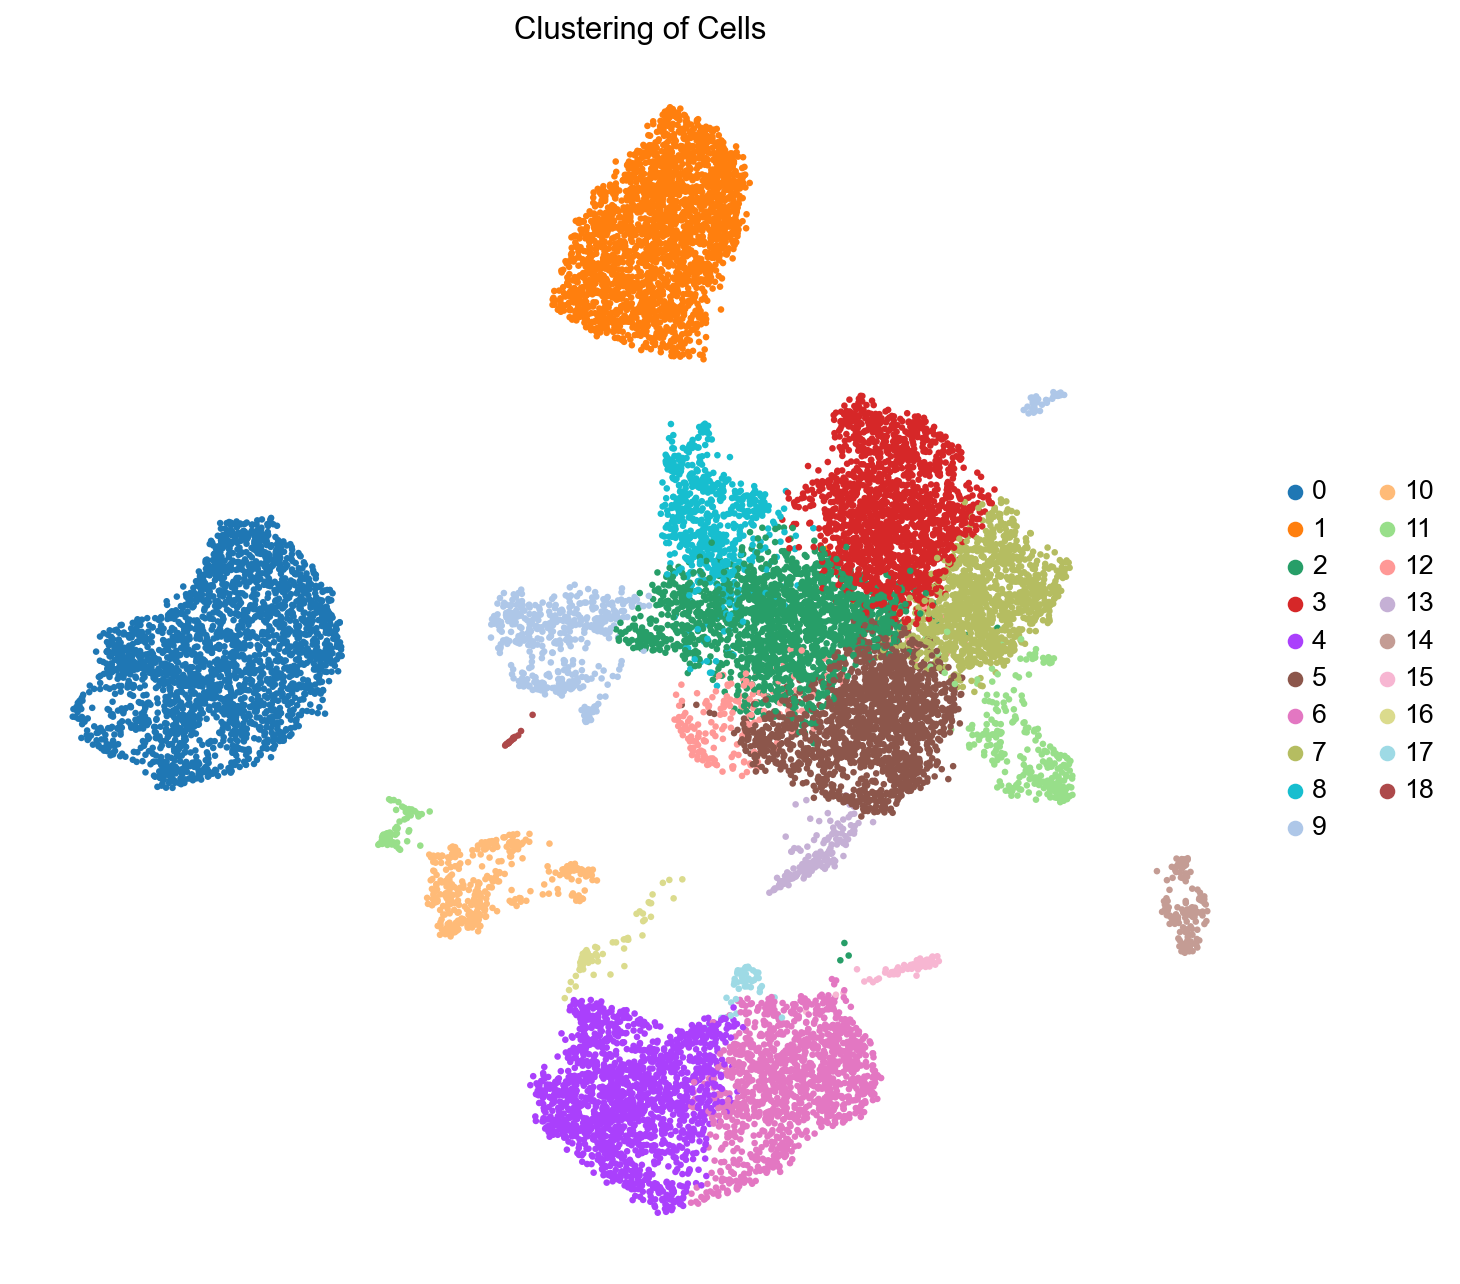

In [104]:

# Customize UMAP plot
sc.set_figure_params(figsize=(10, 10))
img_tag = "_color"  # Specify your image tag here
sc.pl.umap(adata, color=['leiden'],  legend_fontsize=12, legend_fontoutline=2, frameon=False, size=35, title='Clustering of Cells', save=f'umap_plot{img_tag}.png')
pl.show()

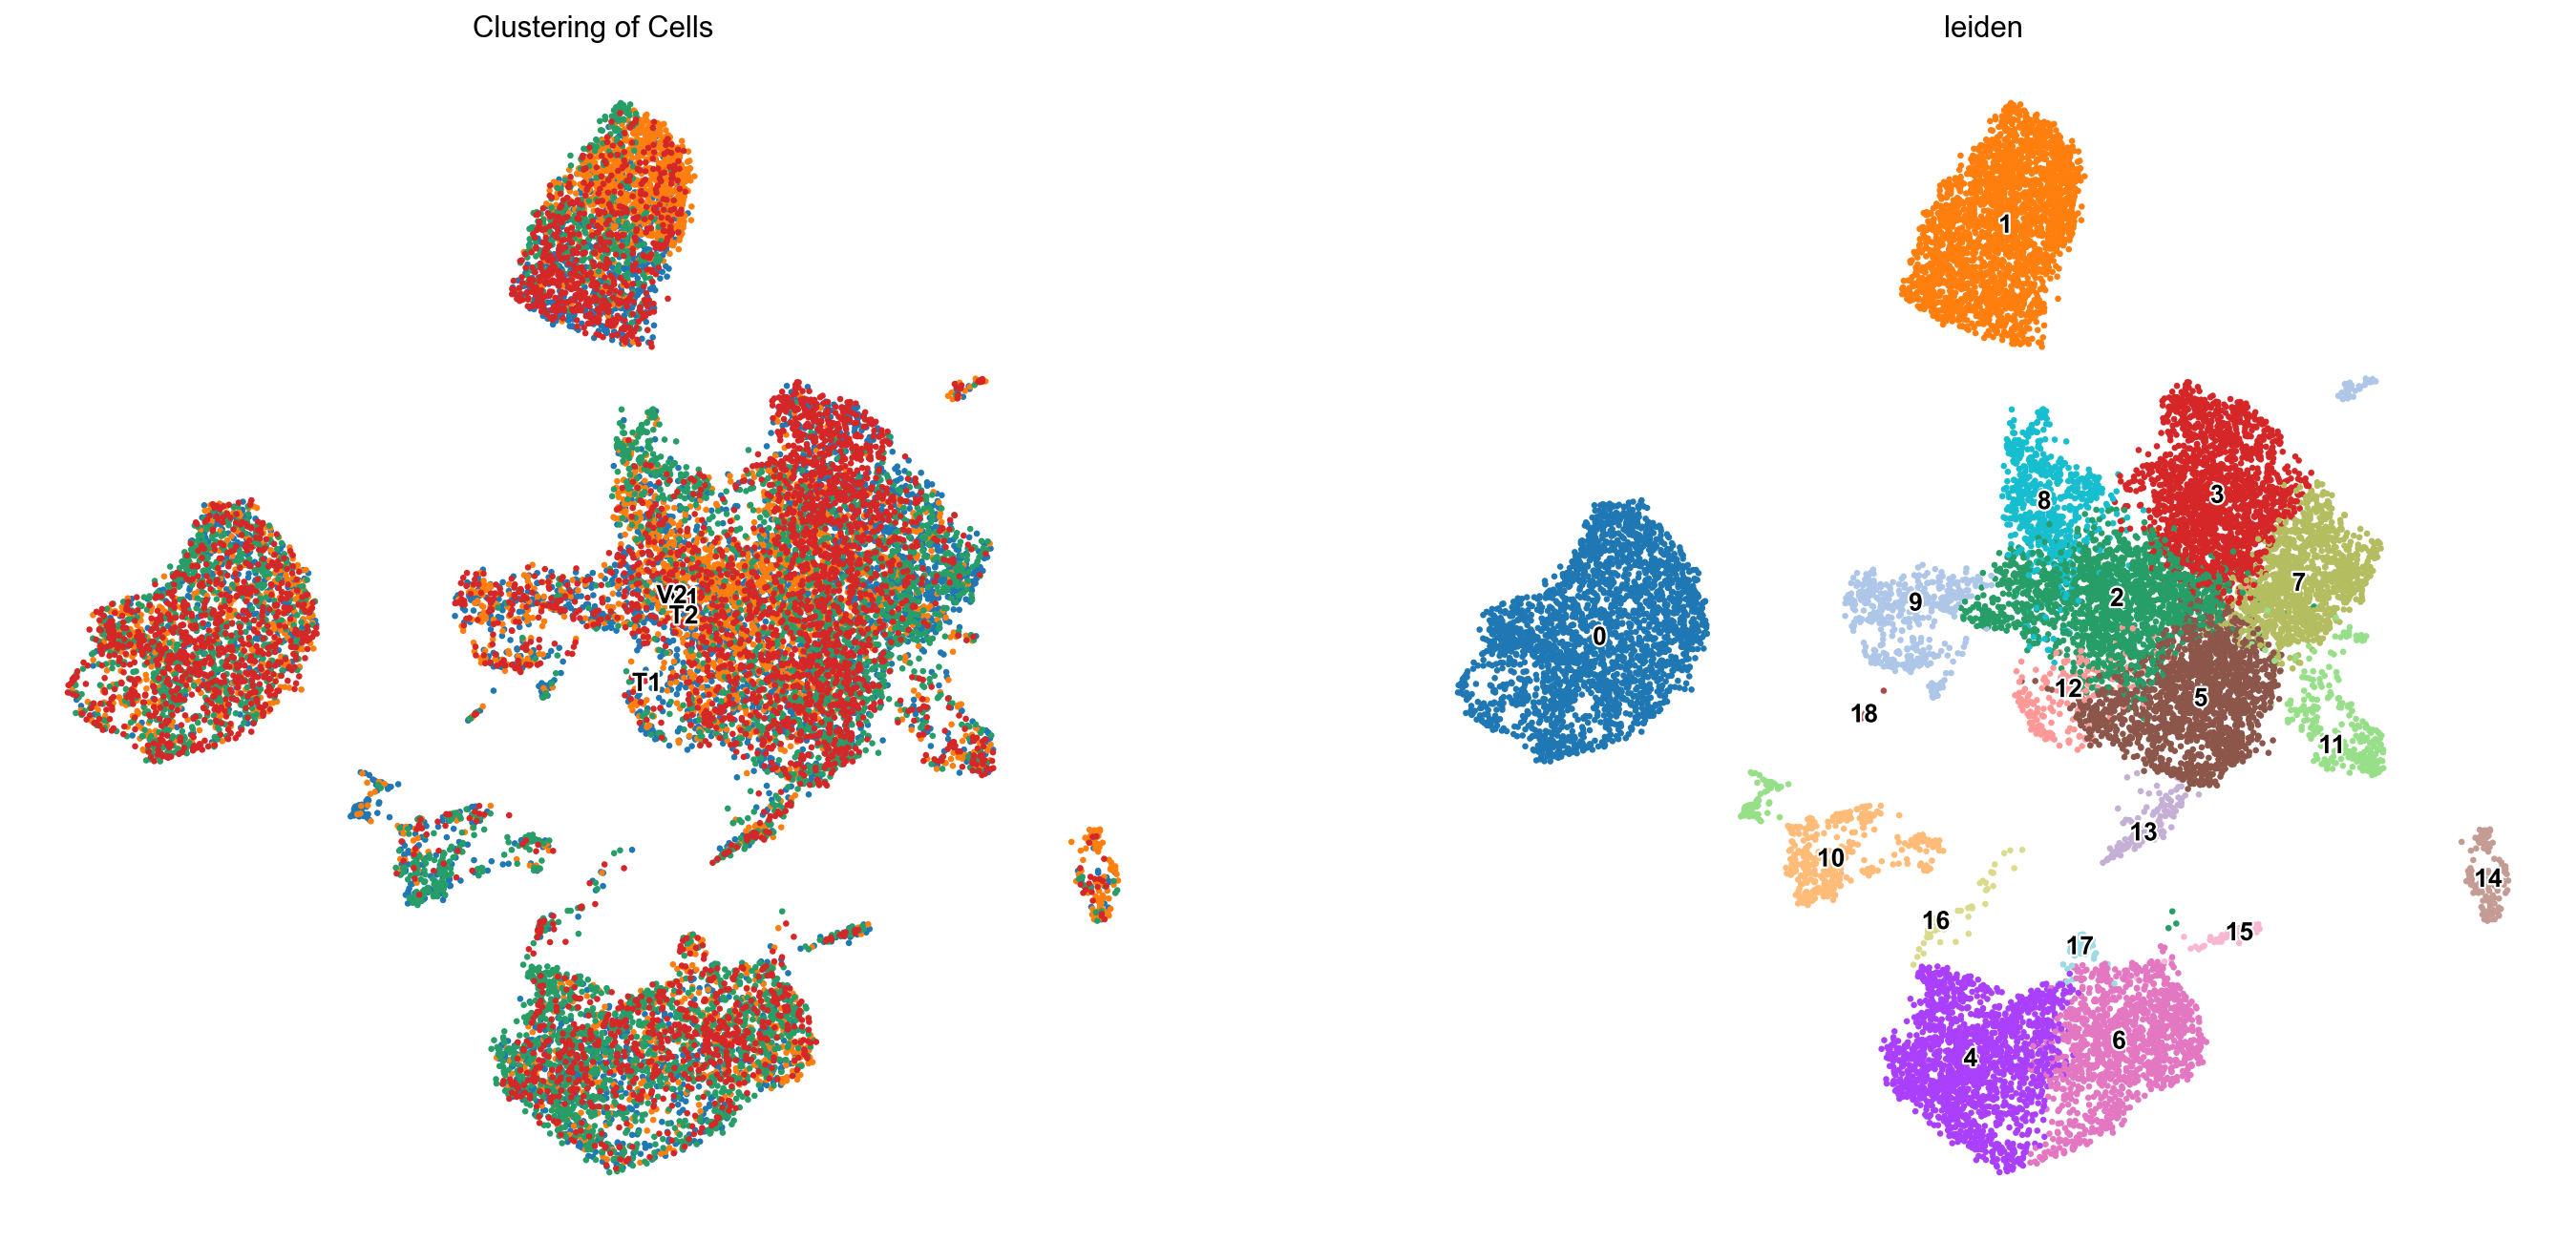

In [105]:
# Customize UMAP plot
sc.set_figure_params(figsize=(10, 10))
img_tag = "_color"  # Specify your image tag here
sc.pl.umap(adata, color=['Sample', 'leiden'], legend_loc='on data', legend_fontsize=12, legend_fontoutline=2, frameon=False, size=35, title='Clustering of Cells', save=f'umap_plot after integration sample and cell type{img_tag}.png')
pl.show()

In [106]:
def filter_anndata_by_gene(adata, gene, lim=1) -> "AnnData object":
    """filters anndata objects by gene
    
    Args: 
        adata: 'anndata object', that we are filtering
        gene: 'str', the gene we wish to filter by
    """
    ind = np.where(adata[:, [gene]].X.flatten() > lim)
    
    return adata[ind[0], :]

In [107]:
genes = ['Esam', 'Gpnmb',  'Pax7'] 
limits = {
    "Esam": 4,
    "Gpnmb": 4,
    "Pax7": 5,
    
}

[Starting umapping]


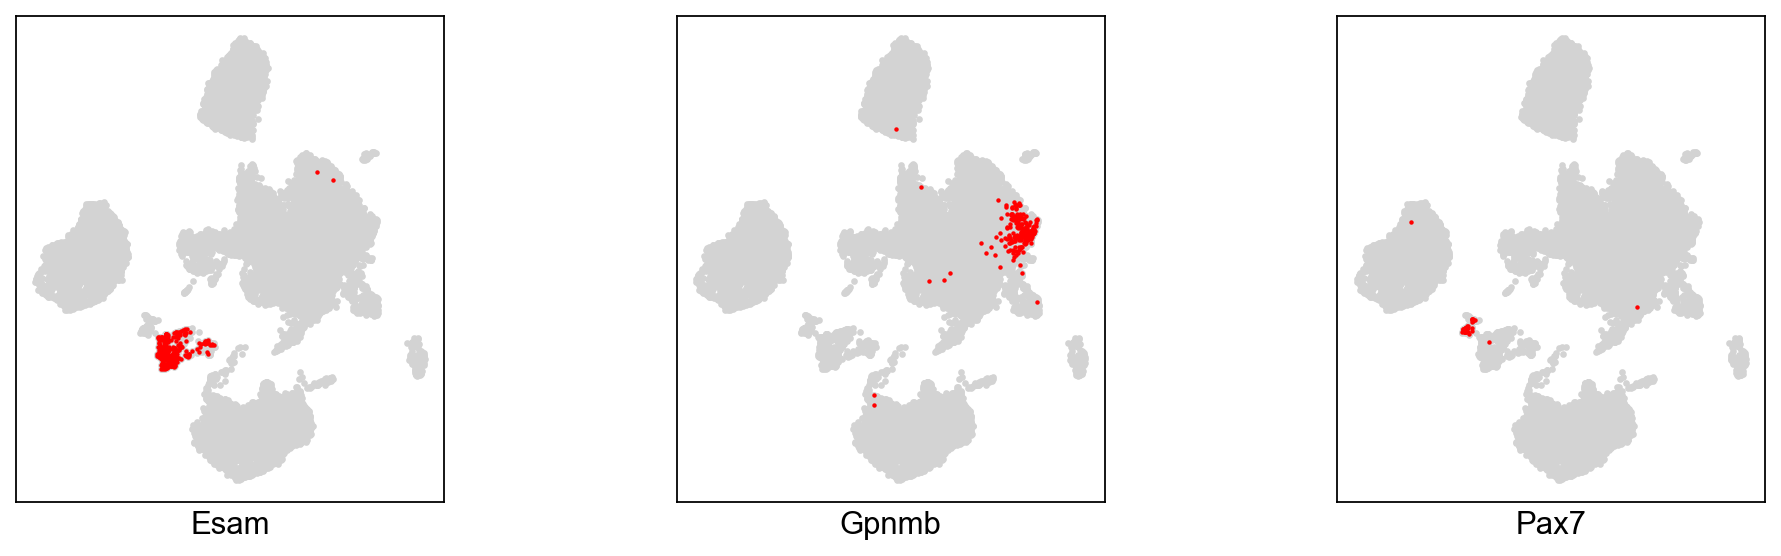

In [108]:
import matplotlib.pyplot as plt
from matplotlib import rc_context

with rc_context({'figure.figsize': (15, 4)}):
    print('[Starting umapping]')
    fig, axs = plt.subplots(ncols=3, nrows=1)
    axs = axs.flatten()
    
    for i in range(len(axs)):
        tmp = filter_anndata_by_gene(adata, genes[i], lim=limits[genes[i]])
        
        axs[i].scatter(x=adata.obsm['X_umap'].T[0], y=adata.obsm['X_umap'].T[1], s=4, c="lightgrey")
        axs[i].scatter(x=tmp.obsm['X_umap'].T[0], y=tmp.obsm['X_umap'].T[1], s=1, c="red")
        axs[i].set_xlabel(genes[i])
        
        axs[i].set_xticks([])  # Hide x-axis ticks
        axs[i].set_yticks([])  # Hide y-axis ticks

        axs[i].set_aspect('equal')  # Set aspect ratio to equal
    plt.savefig(os.path.join(sc.settings.figdir, "marker_plot.png"))
    pl.show()
    # plt.close()


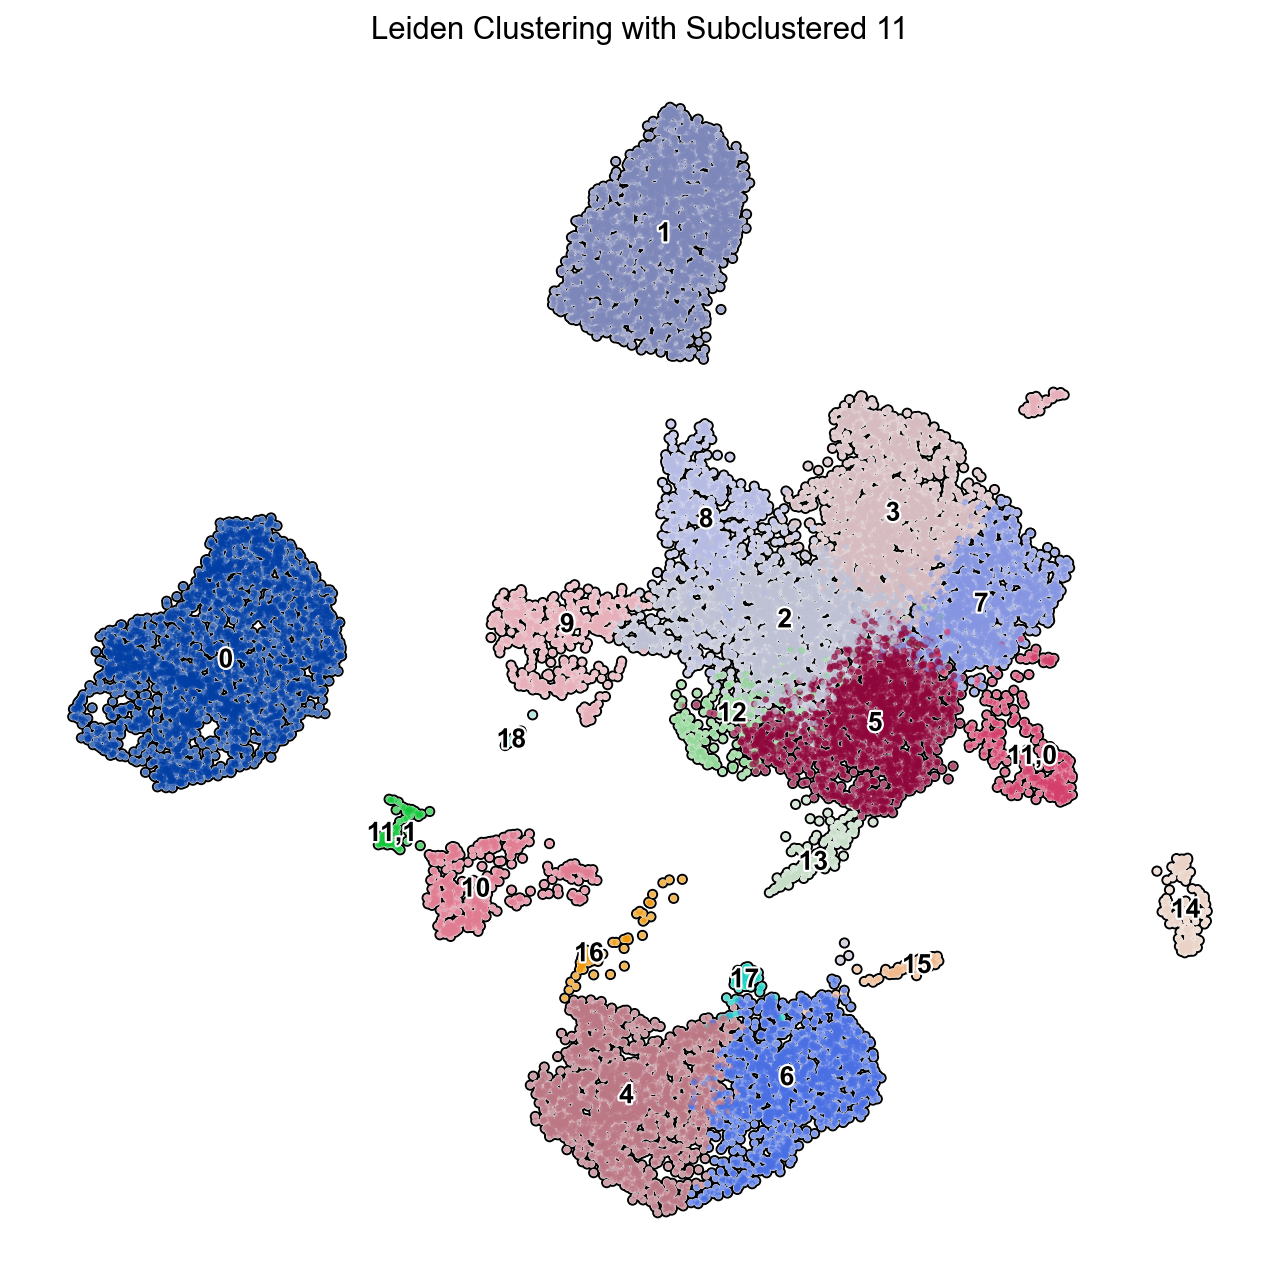

In [109]:
import scanpy as sc

# Rename original Leiden cluster labels
leiden_labels = ["0", "1", "2", "3", "4",
                 "5", "6", "7", "8", "9",
                 "10", "11", "12", "13", "14",
                 "15", "16", "17", "18"]

adata.obs['leiden'] = adata.obs['leiden'].astype("category")  # Ensure categorical type
adata.obs['leiden'] = adata.obs['leiden'].cat.rename_categories(leiden_labels)  # Correct renaming

# Create a copy of the original Leiden cluster assignments
adata.obs['leiden_R'] = adata.obs['leiden'].astype(str)  # Preserve all clusters as strings

# Subcluster within Leiden cluster '11'
sc.tl.leiden(adata, restrict_to=('leiden', ['11']), resolution=0.05, key_added='sub_leiden')

# Convert the subcluster labels to string type
adata.obs['sub_leiden'] = adata.obs['sub_leiden'].astype(str)

# Replace new subcluster labels ('0' → '11,0', '1' → '11,1')
adata.obs['sub_leiden'] = adata.obs['sub_leiden'].replace({'0': '11,0', '1': '11,1'})

# Assign subclusters back to `leiden_R` only for the original cluster 11
subset_mask = adata.obs['leiden'] == '11'
adata.obs.loc[subset_mask, 'leiden_R'] = adata.obs.loc[subset_mask, 'sub_leiden']

# Remove 'sub_leiden' to avoid redundancy
adata.obs.drop(columns=['sub_leiden'], inplace=True)

# Plot updated UMAP
sc.pl.umap(adata, color='leiden_R', add_outline=True, legend_loc='on data',
           legend_fontsize=12, legend_fontoutline=2, frameon=False, size=35,
           title='Leiden Clustering with Subclustered 11')

# Find marker genes for the refined clustering
sc.tl.rank_genes_groups(adata, 'leiden_R', method='wilcoxon')


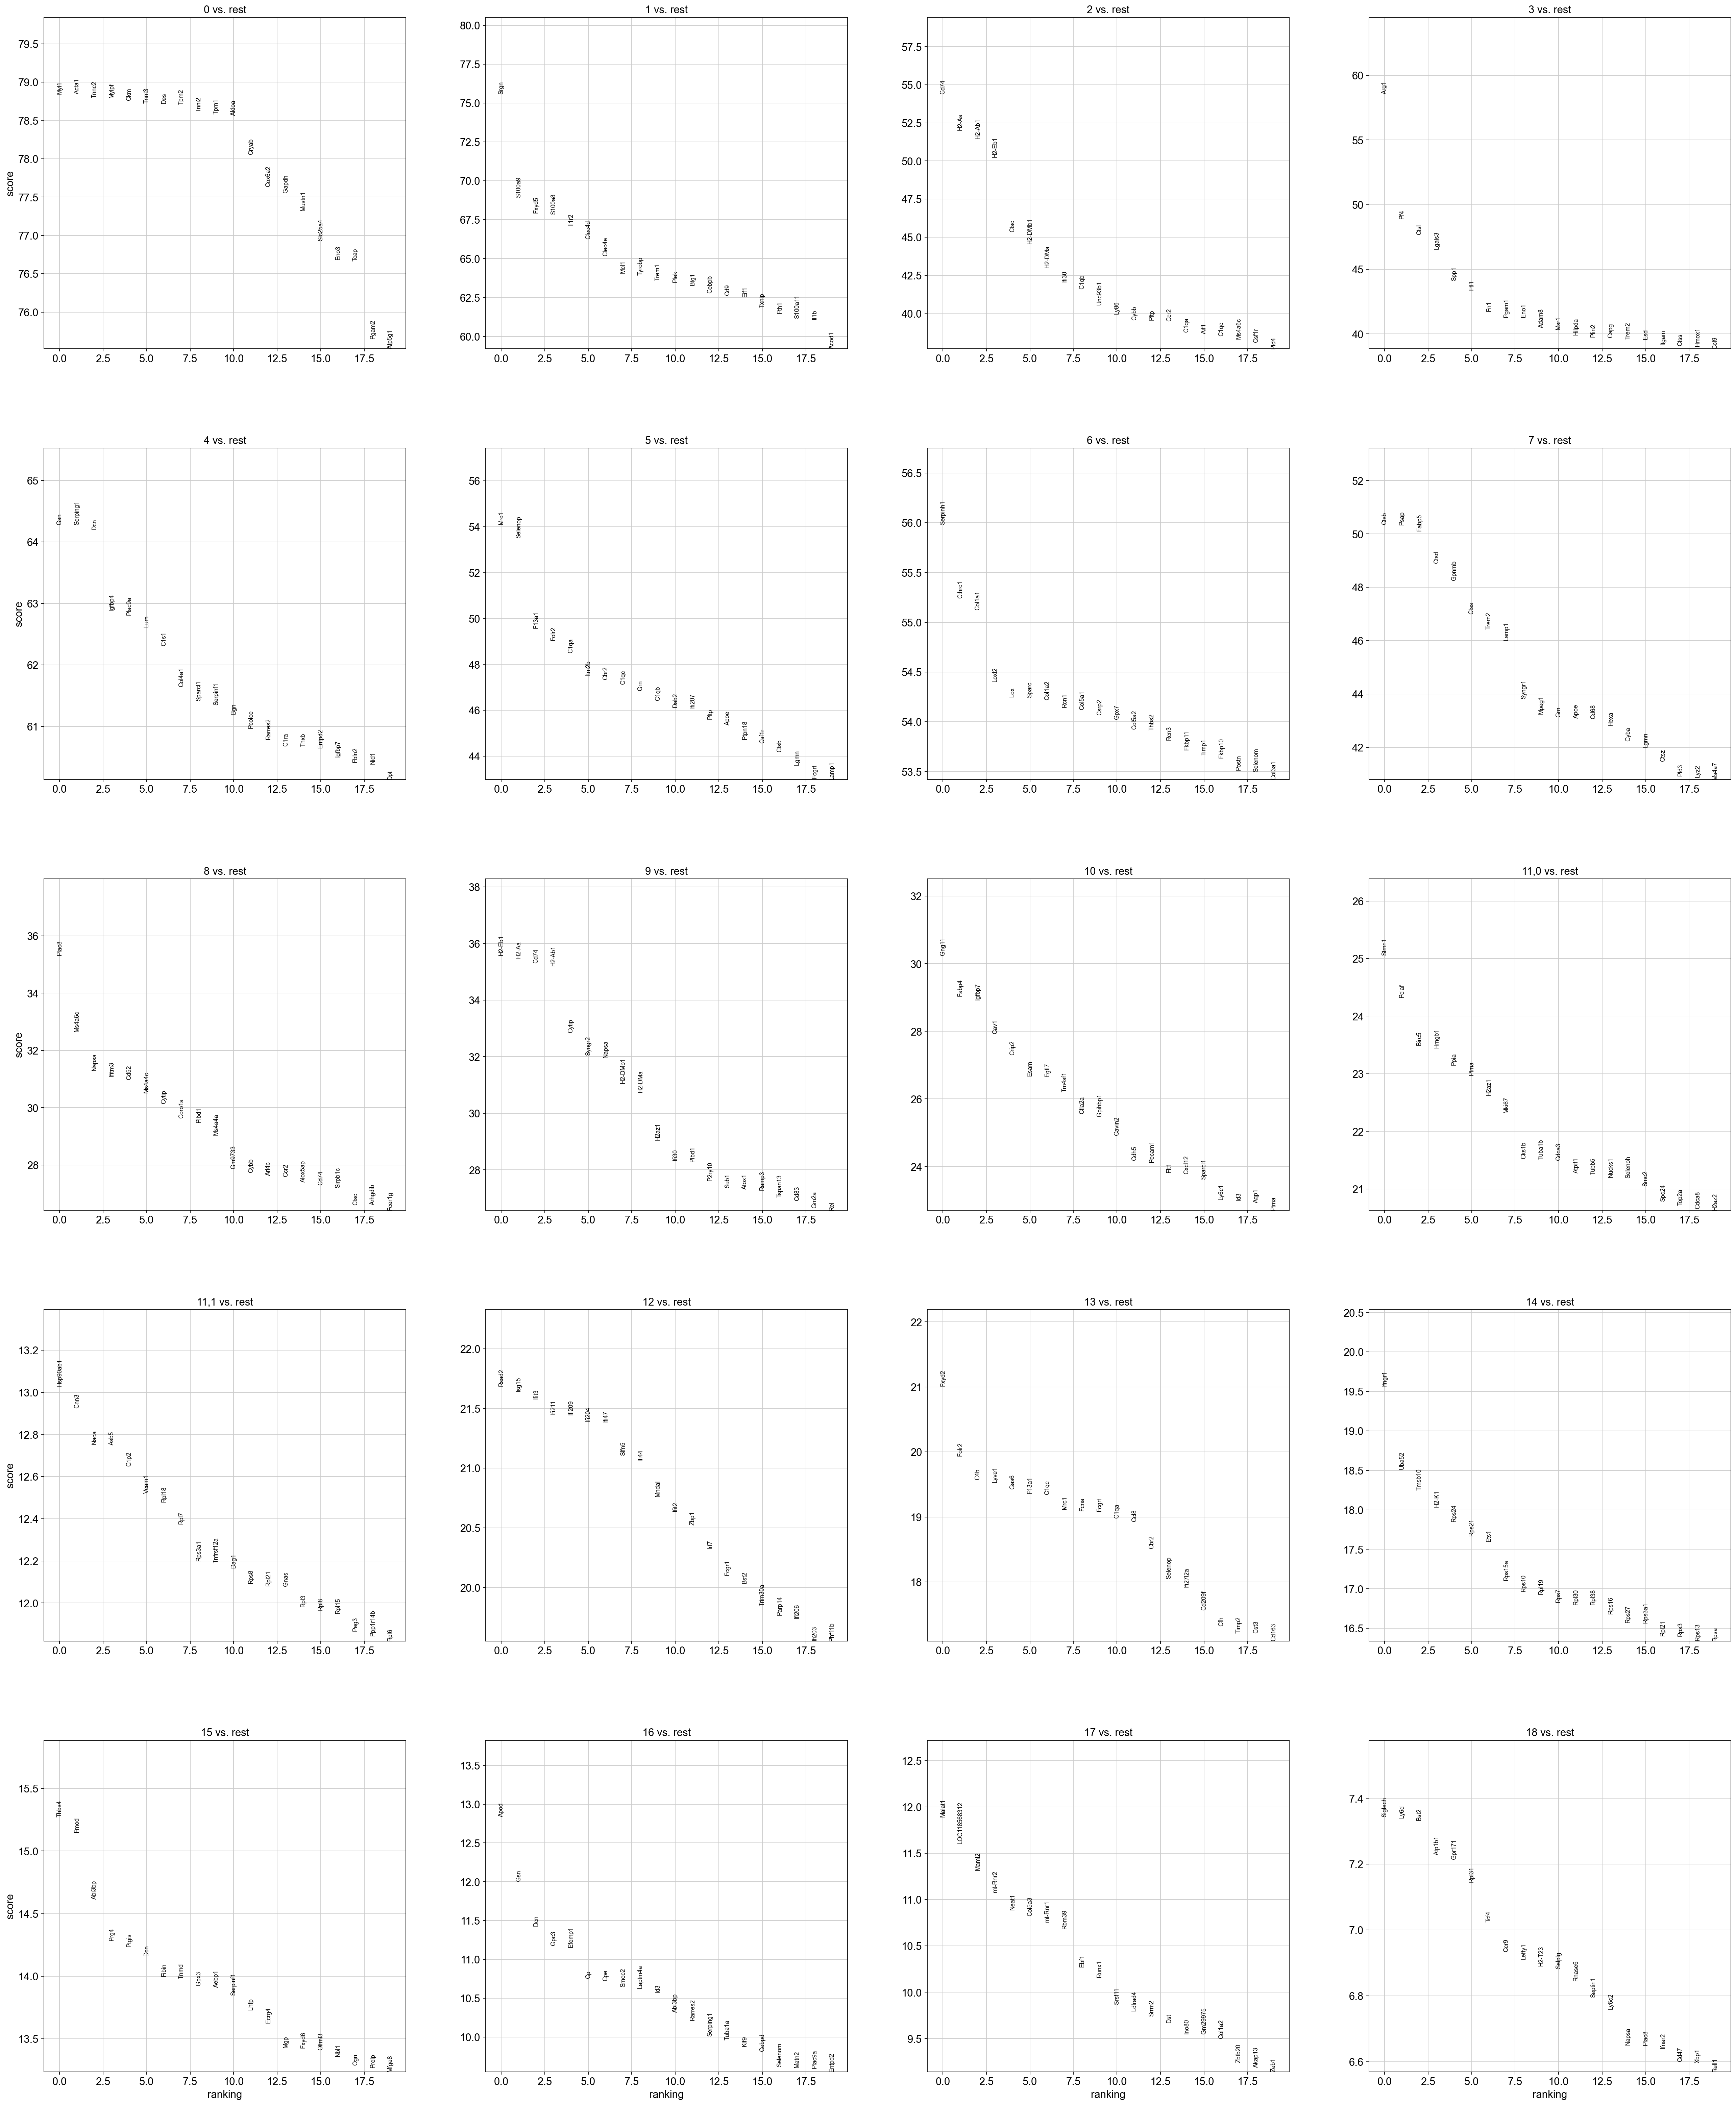

In [110]:
# Plot the top 20 ranked genes
sc.pl.rank_genes_groups(adata, n_genes=20, sharey=False, save=f'rankgenese{img_tag}.png')

In [111]:
result=adata.uns['rank_genes_groups']
groups=result ['names'].dtype.names
df=pd.DataFrame(
    {group + '_' + key[:15]: result [key] [group]
     for group in groups for key in ['names', 'scores', 'pvals', 'pvals_adj', 'logfoldchanges']})

In [112]:
markers = sc.get.rank_genes_groups_df(adata, None)
markers = markers[(markers.pvals_adj < 0.05) & (markers.logfoldchanges > .5)]
markers

group    names     scores  logfoldchanges     pvals  pvals_adj
0          0     Myl1  78.846489        9.885998  0.000000   0.000000
1          0    Acta1  78.846031        9.961697  0.000000   0.000000
2          0    Tnnc2  78.797150        9.856908  0.000000   0.000000
3          0    Mylpf  78.795074        9.895204  0.000000   0.000000
4          0      Ckm  78.761887        9.980309  0.000000   0.000000
...      ...      ...        ...             ...       ...        ...
367205    18     Emg1   3.234090        1.567433  0.001220   0.048471
367206    18      Pir   3.232153        3.521241  0.001229   0.048700
367207    18    Erbin   3.230937        1.521721  0.001234   0.048742
367208    18     Tbcc   3.230043        1.972713  0.001238   0.048761
367209    18  Serinc3   3.227139        1.245811  0.001250   0.049158

[41933 rows x 6 columns]

In [148]:
markers[markers.names =='Ebf1']  

group names     scores  logfoldchanges         pvals     pvals_adj
77277      4  Ebf1  56.369400        4.242402  0.000000e+00  0.000000e+00
115908     6  Ebf1  48.621914        3.667738  0.000000e+00  0.000000e+00
193157    10  Ebf1  13.999675        2.448344  1.565849e-44  1.460249e-42
309059    15  Ebf1   8.592581        2.103835  8.503760e-18  7.706881e-16
328295    16  Ebf1   6.497900        2.129738  8.144855e-11  7.559052e-09
347480    17  Ebf1  10.272872        5.147398  9.338281e-25  1.060389e-21

In [170]:
cell_type = {
    "0": "Mature skeletal muscle",
    "1": "Neutrophils",
    "2": "Residence Macrophages/APC I",
    "3": "Monocytes/Macrophages",
    "4": "Fibroadipogenic cells",
    "5": "Anti-inflammatory Macrophages II",
    "6": "Myo-Fibroblast",
    "7": "Lipid-Laden Macrophages",
    "8": "Residence Macrophages/APC II",
    "9": "Classical dendritic cell",
    "10": "Endothelial cells",
    "11,0": "Proliferation",  # Changed from "11_0"
    "11,1": "MuSCs",         # Changed from "11_1"
    "12": "Interferons",
    "13": "Anti-inflammatory Macrophages I",
    "14": "T-lymphocytes and NKCs",
    "15": "Tenocyte",
    "16": "Fibroblast I",
    "17": "Fibroblast II",
    "18": "Residence Macrophages/APC III",
}

# Now map the 'leiden_R' column to 'cell type'
adata.obs['cell type'] = adata.obs['leiden_R'].map(cell_type)


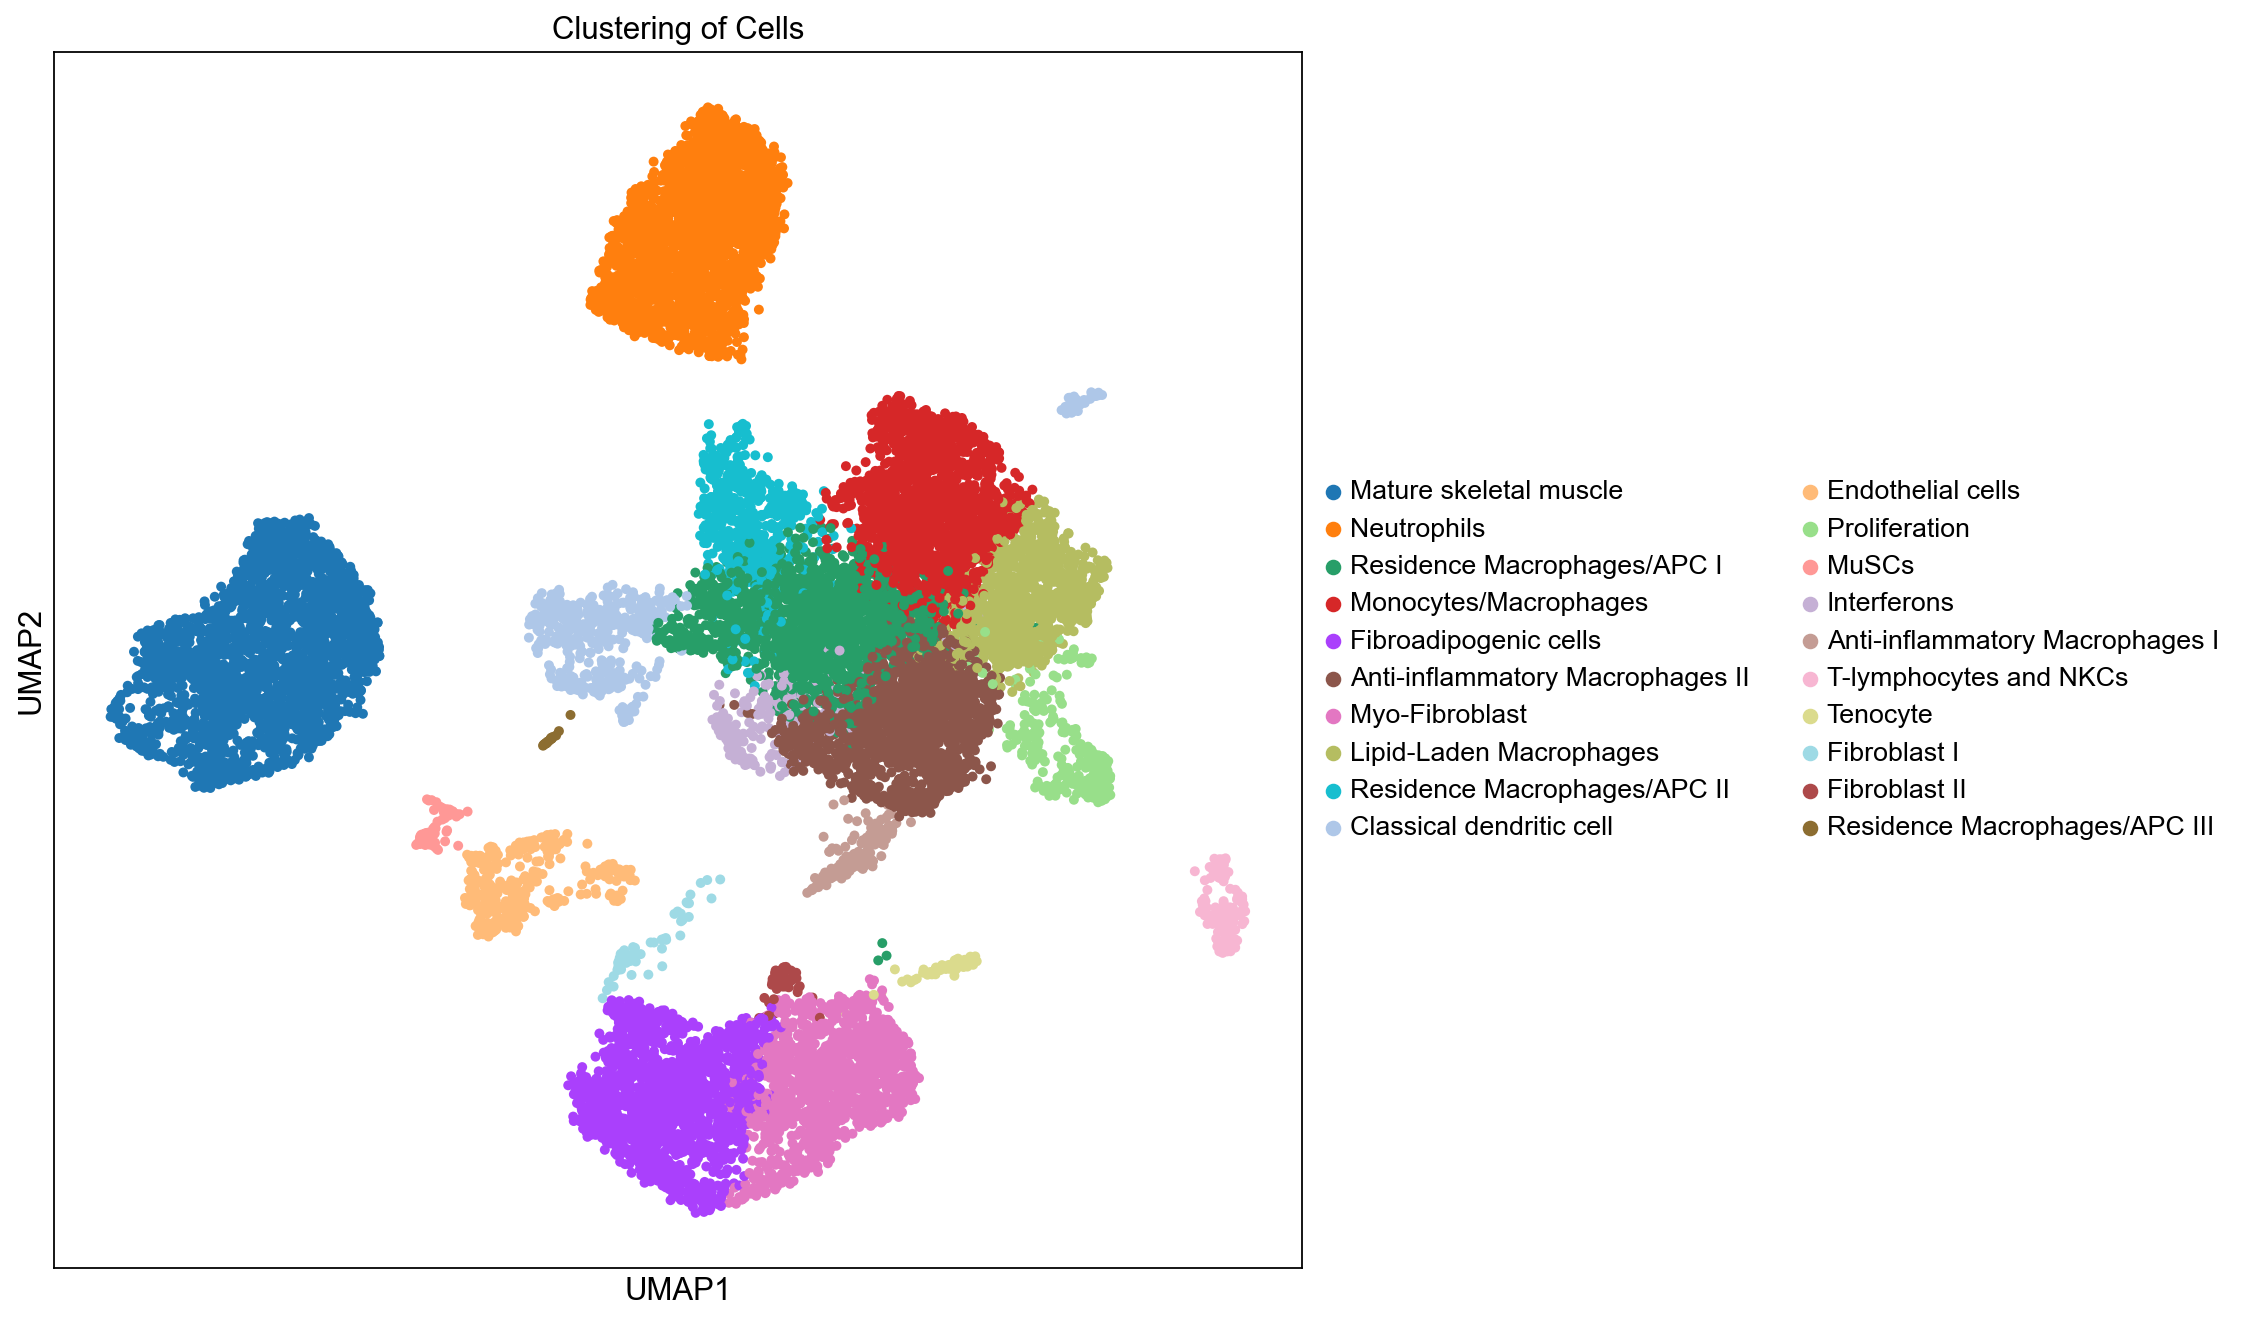

In [171]:
#UMAP plot
sc.set_figure_params(figsize=(10, 10))
img_tag = "_color"  # Specify your image tag here
sc.pl.umap(adata, color=['cell type'],  legend_fontsize=12, legend_fontoutline=2, frameon=True, size=80, title='Clustering of Cells', save=f'umap_plot{img_tag}.png')
pl.show()

<Figure size 1120x800 with 0 Axes>

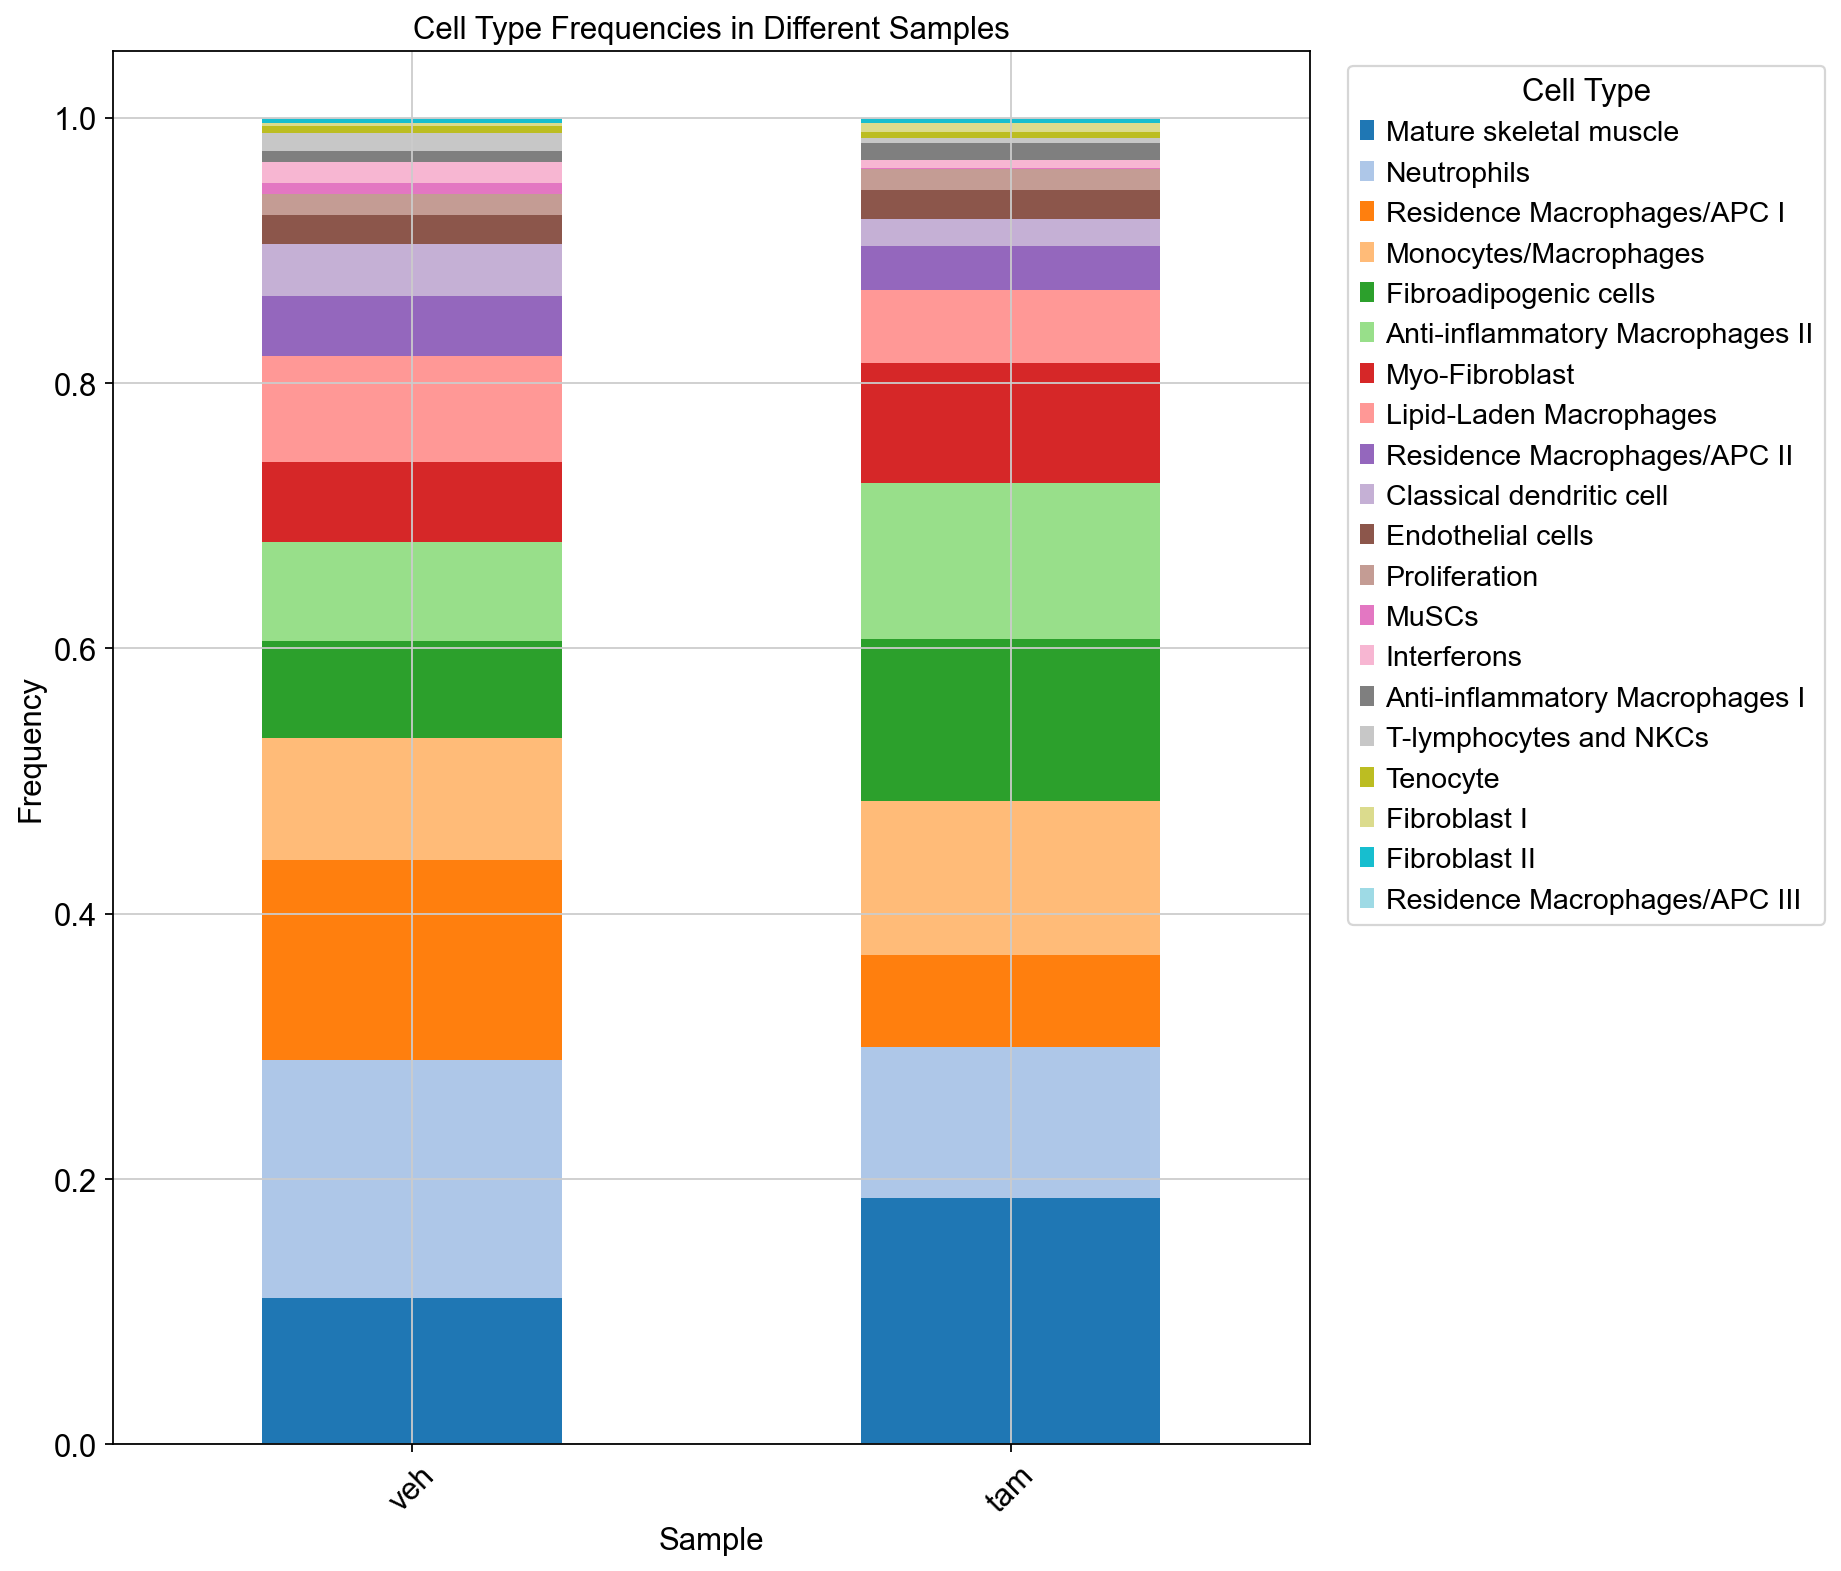

In [188]:
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

# Assuming 'adata' is your AnnData object and it's already loaded.

# Define the map_condition function
def map_condition(x):
    if 'T' in x:
        return 'tam'  # lowercase
    else:
        return 'veh'  # lowercase

# Apply the map_condition function
adata.obs['condition'] = adata.obs.Sample.map(map_condition)

# Grouping by condition and cell type to get cell type counts
cell_type_counts = adata.obs.groupby(['condition', 'cell type']).size().reset_index(name='count')

# Adding total cell counts for each condition
total_cells = adata.obs.groupby('condition').size().reset_index(name='total_cells')

# Ensure 'condition' column is categorized to maintain the specified order
sample_order = ['veh', 'tam']  # 'veh' first, 'tam' second
total_cells['condition'] = pd.Categorical(total_cells['condition'], categories=sample_order, ordered=True)

# Merge total cell counts back to cell_type_counts
cell_type_counts = pd.merge(cell_type_counts, total_cells, on='condition', how='left')

# Ensure the total_cells column is numeric
cell_type_counts['total_cells'] = cell_type_counts['total_cells'].astype(int)

# Calculate the frequency of each cell type in each condition
cell_type_counts['frequency'] = cell_type_counts['count'] / cell_type_counts['total_cells']

# Set the figure size larger to accommodate longer labels
plt.figure(figsize=(14, 10))

# Pivot the DataFrame for a stacked bar plot
stacked_data = cell_type_counts.pivot_table(index='condition', columns='cell type', values='frequency', fill_value=0)

# Explicitly set the order of the rows in the stacked_data to match the sample_order
stacked_data = stacked_data.loc[sample_order]

# Create a stacked bar plot with distinct colors for each cell type
ax = stacked_data.plot(kind='bar', stacked=True, colormap='tab20')

# Set plot properties
plt.xlabel('Sample')
plt.ylabel('Frequency')
plt.title('Cell Type Frequencies in Different Samples')
plt.tight_layout(rect=[0, 0, 0.85, 1])  # Adjust the layout to make room for the legend

# Rotate x-axis labels
plt.xticks(rotation=45)

# Move the legend to the right side
plt.legend(title='Cell Type', bbox_to_anchor=(1.02, 1), loc='upper left')
plt.savefig('bar1_plot.png')
# Show the plot
plt.show()



In [179]:


# Define the map_condition function
def map_condition(x):
    if 'T' in x:
        return 'tam'  # lowercase
    else:
        return 'veh'  # lowercase

In [180]:
adata.obs['condition'] = adata.obs.Sample.map(map_condition)
adata.obs

doublet  n_genes  n_genes_by_counts  total_counts  \
AAACCCAAGCCTTGAT-1    False     3227               3227       15930.0   
AAACCCAAGTTCCATG-1    False     1454               1454        4036.0   
AAACCCACAGCTATAC-1    False     2264               2264        8052.0   
AAACCCAGTCCTGTCT-1    False     2522               2522       10531.0   
AAACCCAGTTTGGCTA-1    False     2672               2672       13004.0   
...                     ...      ...                ...           ...   
TTTGTTGAGGCCACTC-1    False     3152               3152       13883.0   
TTTGTTGCAAGTGGCA-1    False     2674               2674       11262.0   
TTTGTTGGTCCATAGT-1    False      834                834        1364.0   
TTTGTTGTCCGCATAA-1    False      985                985        2231.0   
TTTGTTGTCTGAGATC-1    False     2947               2947       11049.0   

                    total_counts_mt  pct_counts_mt  total_counts_ribo  \
AAACCCAAGCCTTGAT-1             69.0       0.433145             3434.0   
AAACCCAAGTTCCATG-1            207.0       5.128840              894.0   
AAACCCACAGCTATAC-1             28.0       0.347740             2119.0   
AAACCCAGTCCTGTCT-1             77.0       0.731175             1998.0   
AAACCCAGTTTGGCTA-1            127.0       0.976623             3549.0   
...                             ...            ...                ...   
TTTGTTGAGGCCACTC-1             67.0       0.482605             1617.0   
TTTGTTGCAAGTGGCA-1            257.0       2.282010             1977.0   
TTTGTTGGTCCATAGT-1             54.0       3.958944              229.0   
TTTGTTGTCCGCATAA-1              6.0       0.268938              193.0   
TTTGTTGTCTGAGATC-1            411.0       3.719794             1256.0   

                    pct_counts_ribo  total_counts_hb  pct_counts_hb Sample  \
AAACCCAAGCCTTGAT-1        21.556810             19.0       0.119272     V1   
AAACCCAAGTTCCATG-1        22.150644              0.0       0.000000     V1   
AAACCCACAGCTATAC-1        26.316442              1.0       0.012419     V1   
AAACCCAGTCCTGTCT-1        18.972557              0.0       0.000000     V1   
AAACCCAGTTTGGCTA-1        27.291601              1.0       0.007690     V1   
...                             ...              ...            ...    ...   
TTTGTTGAGGCCACTC-1        11.647339              3.0       0.021609     T2   
TTTGTTGCAAGTGGCA-1        17.554607              2.0       0.017759     T2   
TTTGTTGGTCCATAGT-1        16.788857              0.0       0.000000     T2   
TTTGTTGTCCGCATAA-1         8.650829              1.0       0.044823     T2   
TTTGTTGTCTGAGATC-1        11.367544              1.0       0.009051     T2   

                   leiden leiden_R                        cell type condition  
AAACCCAAGCCTTGAT-1     15       15                         Tenocyte       veh  
AAACCCAAGTTCCATG-1     10       10                Endothelial cells       veh  
AAACCCACAGCTATAC-1     11     11,1                            MuSCs       veh  
AAACCCAGTCCTGTCT-1      8        8     Residence Macrophages/APC II       veh  
AAACCCAGTTTGGCTA-1      2        2      Residence Macrophages/APC I       veh  
...                   ...      ...                              ...       ...  
TTTGTTGAGGCCACTC-1      7        7          Lipid-Laden Macrophages       tam  
TTTGTTGCAAGTGGCA-1      7        7          Lipid-Laden Macrophages       tam  
TTTGTTGGTCCATAGT-1      2        2      Residence Macrophages/APC I       tam  
TTTGTTGTCCGCATAA-1      1        1                      Neutrophils       tam  
TTTGTTGTCTGAGATC-1     13       13  Anti-inflammatory Macrophages I       tam  

[16455 rows x 15 columns]

In [181]:
num_tot_cells = adata.obs.groupby(['Sample']).count()
num_tot_cells = dict(zip(num_tot_cells.index, num_tot_cells.doublet))
num_tot_cells

{'V1': 4382, 'V2': 3848, 'T1': 4045, 'T2': 4180}

In [182]:
cell_type_counts = adata.obs.groupby(['Sample', 'condition', 'cell type']).count()
cell_type_counts = cell_type_counts[cell_type_counts.sum(axis = 1) > 0].reset_index()
cell_type_counts = cell_type_counts[cell_type_counts.columns[0:4]]
cell_type_counts

Sample condition                      cell type  doublet
0      V1       veh         Mature skeletal muscle      388
1      V1       veh                    Neutrophils      625
2      V1       veh    Residence Macrophages/APC I      596
3      V1       veh          Monocytes/Macrophages      505
4      V1       veh          Fibroadipogenic cells      391
..    ...       ...                            ...      ...
74     T2       tam         T-lymphocytes and NKCs       20
75     T2       tam                       Tenocyte       13
76     T2       tam                   Fibroblast I       23
77     T2       tam                  Fibroblast II       15
78     T2       tam  Residence Macrophages/APC III        3

[79 rows x 4 columns]

In [183]:
cell_type_counts['total_cells'] = cell_type_counts.Sample.map(num_tot_cells).astype(int)

cell_type_counts['frequency'] = cell_type_counts.doublet / cell_type_counts.total_cells

cell_type_counts

Sample condition                      cell type  doublet  total_cells  \
0      V1       veh         Mature skeletal muscle      388         4382   
1      V1       veh                    Neutrophils      625         4382   
2      V1       veh    Residence Macrophages/APC I      596         4382   
3      V1       veh          Monocytes/Macrophages      505         4382   
4      V1       veh          Fibroadipogenic cells      391         4382   
..    ...       ...                            ...      ...          ...   
74     T2       tam         T-lymphocytes and NKCs       20         4180   
75     T2       tam                       Tenocyte       13         4180   
76     T2       tam                   Fibroblast I       23         4180   
77     T2       tam                  Fibroblast II       15         4180   
78     T2       tam  Residence Macrophages/APC III        3         4180   

    frequency  
0    0.088544  
1    0.142629  
2    0.136011  
3    0.115244  
4    0.089229  
..        ...  
74   0.004785  
75   0.003110  
76   0.005502  
77   0.003589  
78   0.000718  

[79 rows x 6 columns]

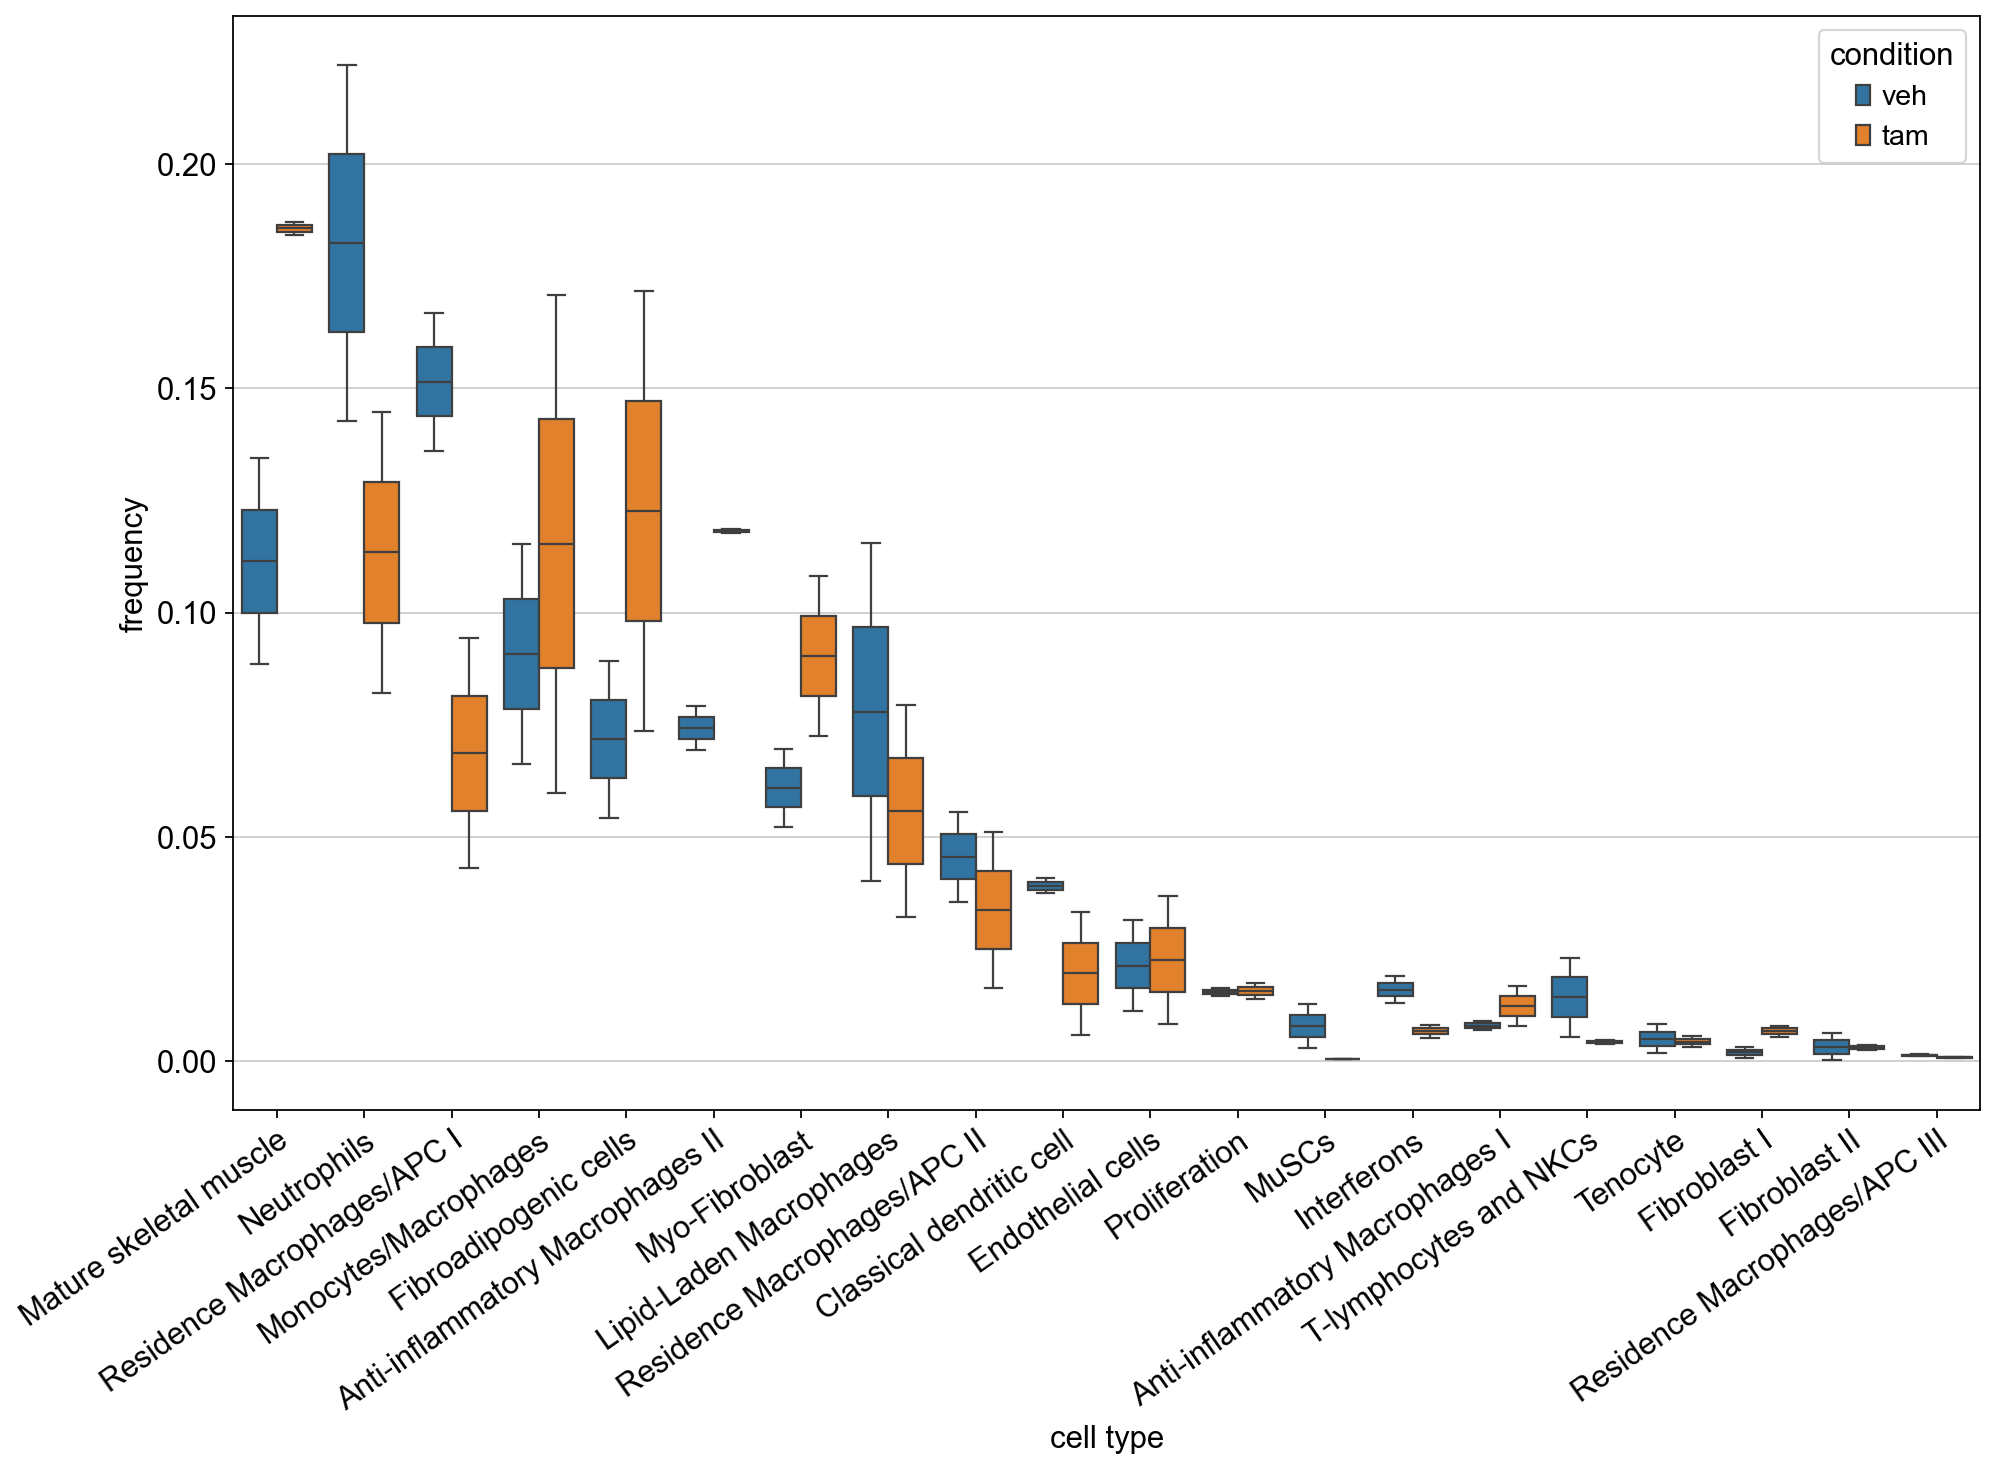

In [187]:
import matplotlib.pyplot as plt

plt.figure(figsize = (14,9))

ax = sns.boxplot(data = cell_type_counts, x = 'cell type', y = 'frequency', hue = 'condition')

plt.xticks(rotation = 35, rotation_mode = 'anchor', ha = 'right')
plt.savefig('bar_plot.png')
plt.show()


In [189]:
# Calculate percentages for each cell type across groups
percentage_data = stacked_data.div(stacked_data.sum(axis=1), axis=0) * 100
# Export percentages to a CSV file
percentage_data.to_csv('cell_type_percentages new99.csv', index=True)


In [190]:
adata.write_h5ad('integrated satellite cell depleted.h5ad')

In [1]:
import matplotlib.pyplot as plt
import numpy as np
import scanpy as sc
import seaborn as sns
from matplotlib import rc_context
import matplotlib as mpl
import pandas as pd
import os
import scanpy as sc
from scipy.sparse import csr_matrix

# Set working directory and read the AnnData object
os.chdir("P:/Tolulope/Cellranger Results/Fry-Murach 4d OV aged")
adata = sc.read_h5ad('integrated satellite cell depleted.h5ad')
# Set the output directory for saving plots
sc.settings.figdir = "FIGURE_2"


C:\Users\tpsa222\.conda\envs\myoung\lib\site-packages\anndata\_core\anndata.py:1754: UserWarning: Observation names are not unique. To make them unique, call `.obs_names_make_unique`.
  utils.warn_names_duplicates("obs")


In [ ]:
cell_type = {
    "0": "Mature skeletal muscle",
    "1": "Neutrophils",
    "2": "Residence Macrophages/APC I",
    "3": "Monocytes/Macrophages",
    "4": "Fibroadipogenic cells",
    "5": "Anti-inflammatory Macrophages II",
    "6": "Myo-Fibroblast",
    "7": "Lipid-Laden Macrophages",
    "8": "Residence Macrophages/APC II",
    "9": "Classical dendritic cell",
    "10": "Endothelial cells",
    "11,0": "Proliferation",  # Changed from "11_0"
    "11,1": "MuSCs",         # Changed from "11_1"
    "12": "Interferons",
    "13": "Anti-inflammatory Macrophages I",
    "14": "T-lymphocytes and NKCs",
    "15": "Tenocyte",
    "16": "Fibroblast I",
    "17": "Fibroblast II",
    "18": "Residence Macrophages/APC III",
}

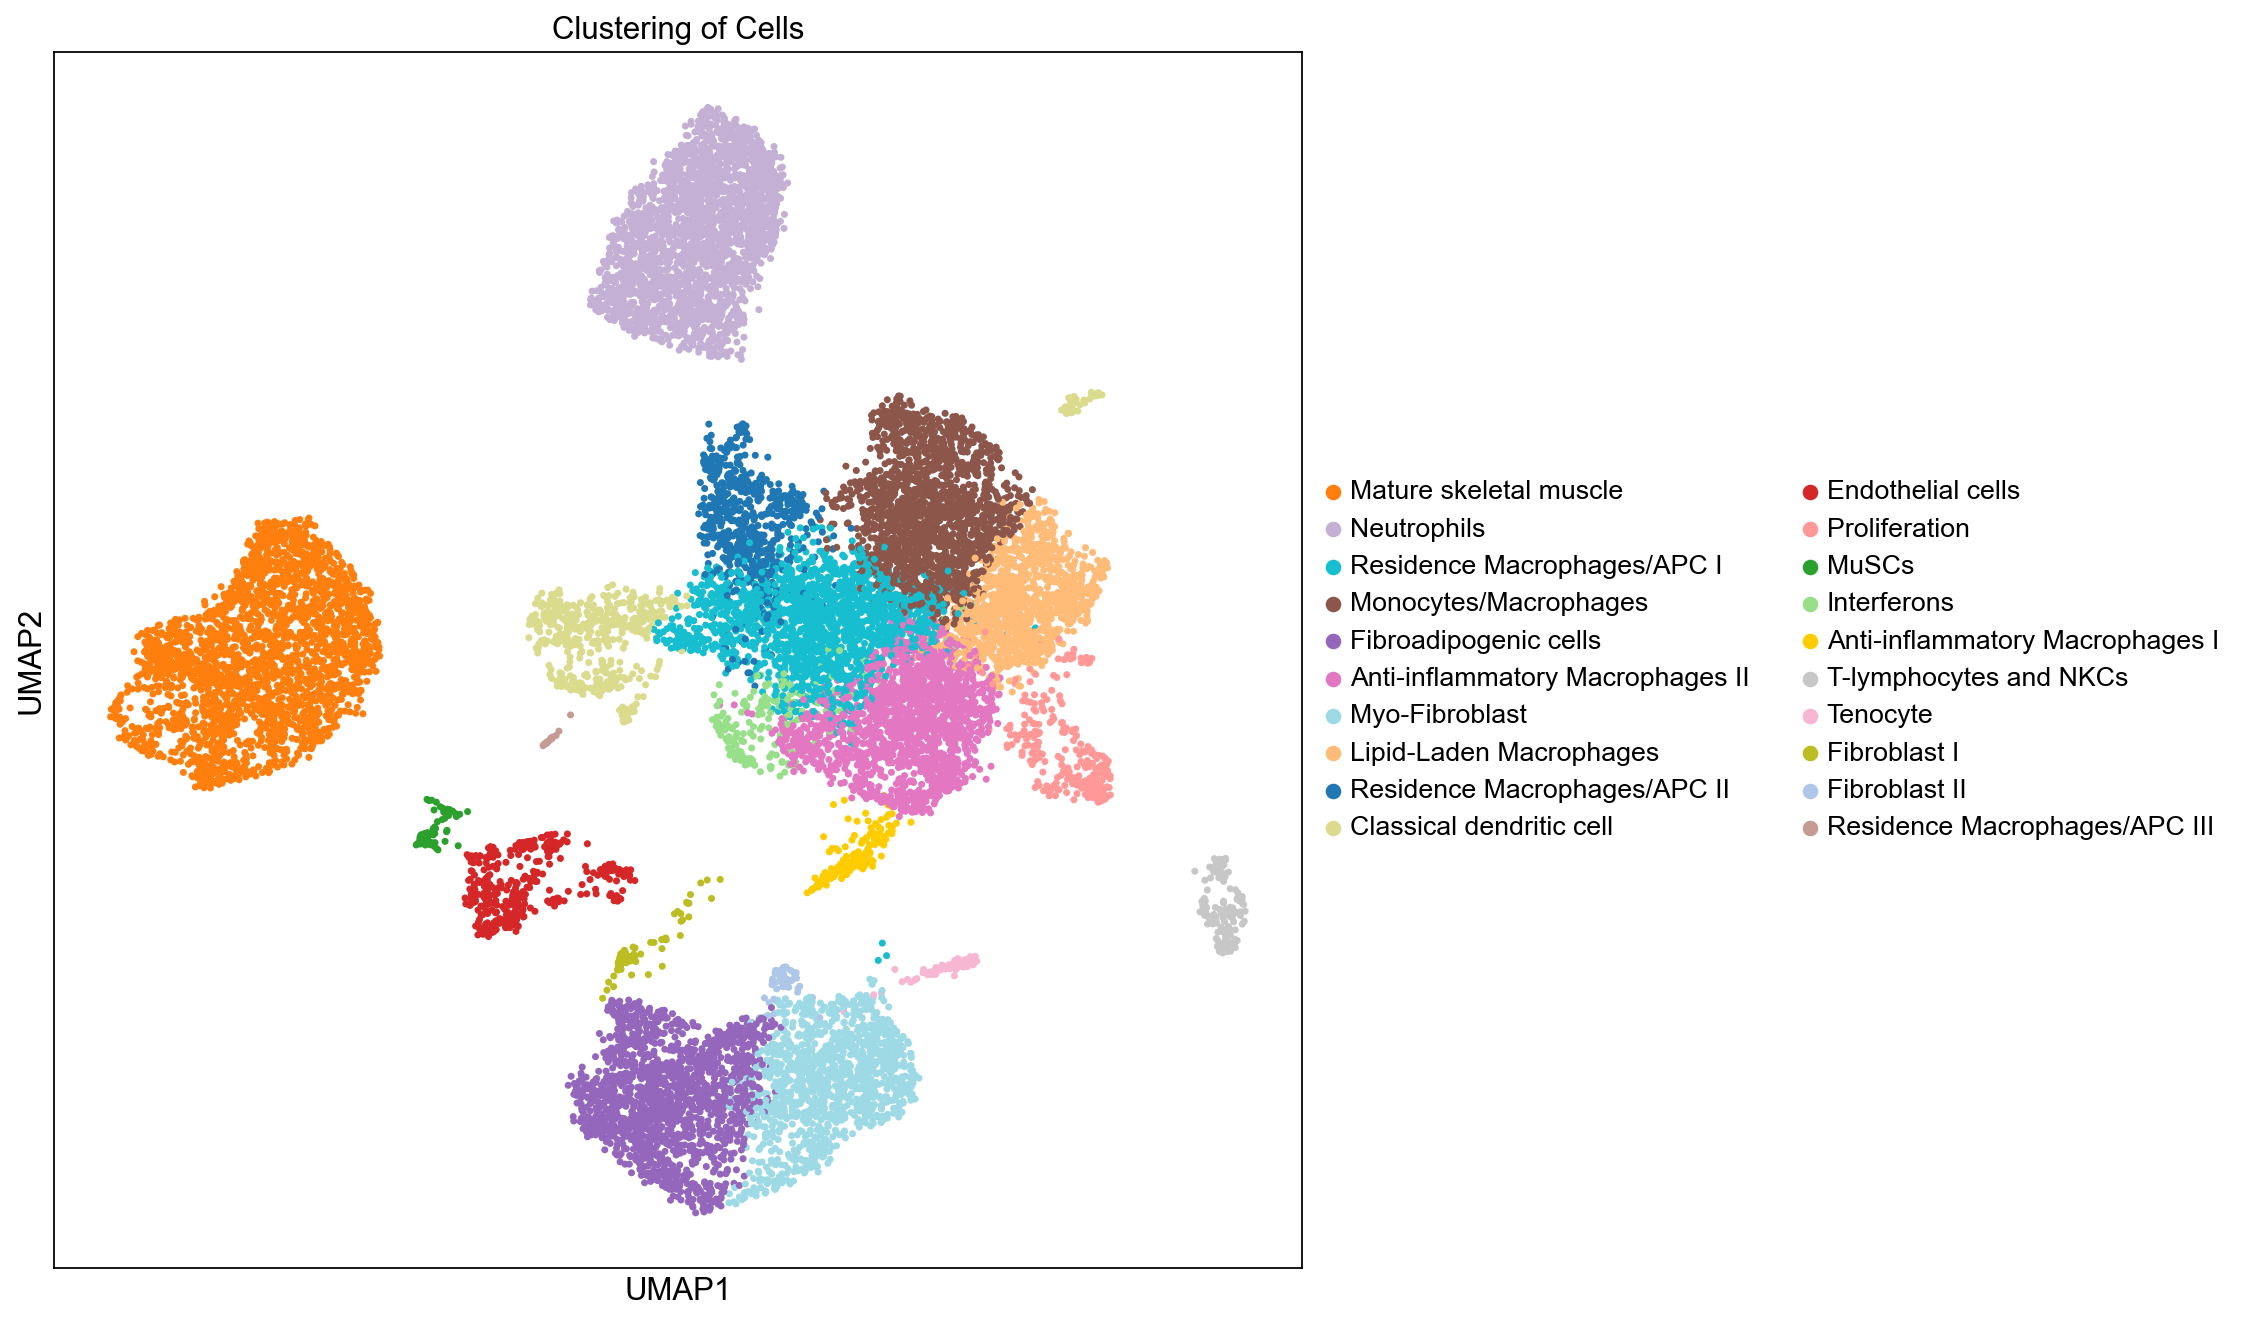

In [3]:
# Set figure parameters
celltypePalette = {
    "Mature skeletal muscle": '#ff7f0e',
    "Neutrophils": '#c5b0d5',
    "Residence Macrophages/APC I": '#17becf',
    "Monocytes/Macrophages": '#8c564b',
    "Fibroadipogenic cells": '#9467bd',
    "Anti-inflammatory Macrophages II": '#e377c2', 
    "Myo-Fibroblast": '#9edae5',
    "Lipid-Laden Macrophages": '#ffbb78',
    "Residence Macrophages/APC II": '#1f77b4',
    "Classical dendritic cell": '#dbdb8d',
    "Endothelial cells": '#d62728',
    "Proliferation": '#ff9896',
    "MuSCs": '#2ca02c',
    "Interferons": '#98df8a',
    "Anti-inflammatory Macrophages I": '#ffcc00',  # Added color code
    "T-lymphocytes and NKCs": '#c7c7c7',
    "Tenocyte": '#f7b6d2',
    "Fibroblast I": '#bcbd22',
    "Fibroblast II": '#aec7e8', 
    "Residence Macrophages/APC III": '#c49c94'
}

# Set figure parameters
sc.set_figure_params(figsize=(10, 10))

# Plot UMAP with specified color palette for cell types
sc.pl.umap(adata, color='cell type', palette=celltypePalette, legend_fontsize=12, legend_fontoutline=2, frameon=True, size=40, title='Clustering of Cells', save='umap_plot_color.png')
plt.show()


C:\Users\tpsa222\AppData\Local\Temp\ipykernel_11664\2289084078.py:39: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  cell_type_counts['condition'] = pd.Categorical(cell_type_counts['condition'], categories=sample_order, ordered=True)
C:\Users\tpsa222\AppData\Local\Temp\ipykernel_11664\2289084078.py:45: FutureWarning: The default value of observed=False is deprecated and will change to observed=True in a future version of pandas. Specify observed=False to silence this warning and retain the current behavior
  stacked_data = filtered_data.pivot_table(index='condition', columns='cell type', values='frequency', fill_value=0)


<Figure size 960x640 with 0 Axes>

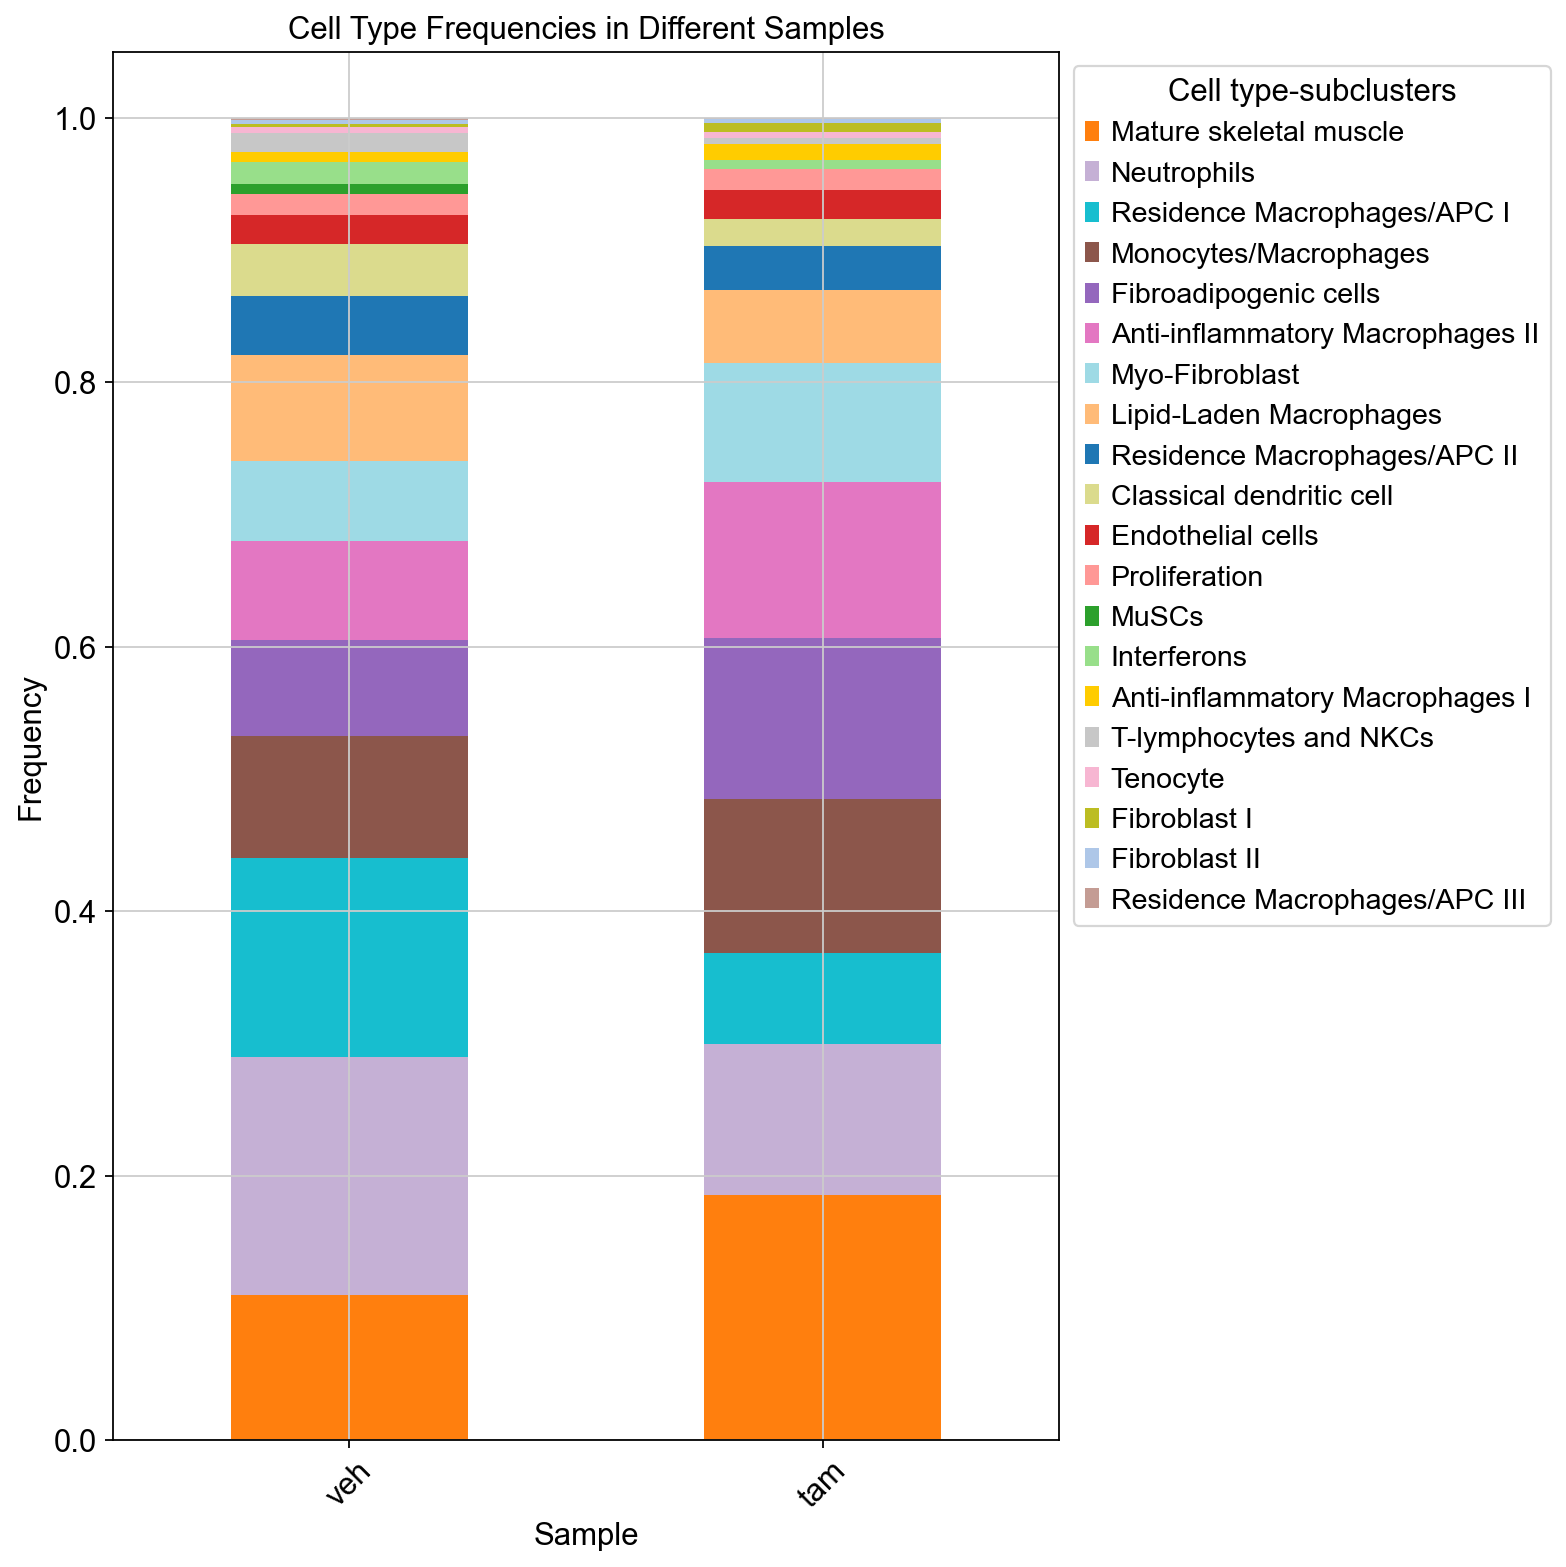

In [9]:
import matplotlib.pyplot as plt
import pandas as pd

# Set figure parameters
celltypePalette = {
    "Mature skeletal muscle": '#ff7f0e',
    "Neutrophils": '#c5b0d5',
    "Residence Macrophages/APC I": '#17becf',
    "Monocytes/Macrophages": '#8c564b',
    "Fibroadipogenic cells": '#9467bd',
    "Anti-inflammatory Macrophages II": '#e377c2', 
    "Myo-Fibroblast": '#9edae5',
    "Lipid-Laden Macrophages": '#ffbb78',
    "Residence Macrophages/APC II": '#1f77b4',
    "Classical dendritic cell": '#dbdb8d',
    "Endothelial cells": '#d62728',
    "Proliferation": '#ff9896',
    "MuSCs": '#2ca02c',
    "Interferons": '#98df8a',
    "Anti-inflammatory Macrophages I": '#ffcc00',  # Added color code
    "T-lymphocytes and NKCs": '#c7c7c7',
    "Tenocyte": '#f7b6d2',
    "Fibroblast I": '#bcbd22',
    "Fibroblast II": '#aec7e8', 
    "Residence Macrophages/APC III": '#c49c94'
}

# Assuming cell_type_counts is already defined and loaded as a DataFrame
# Filter cell_type_counts to include only relevant columns
cell_type_counts = cell_type_counts[['condition', 'cell type', 'frequency']]

# Set the figure size
plt.figure(figsize=(12, 8))

# Define the order of samples in the plot
sample_order = ['veh', 'tam']

# Ensure the condition column in cell_type_counts is ordered correctly
cell_type_counts['condition'] = pd.Categorical(cell_type_counts['condition'], categories=sample_order, ordered=True)

# Filter data for the specified samples
filtered_data = cell_type_counts[cell_type_counts['condition'].isin(sample_order)]

# Pivot the DataFrame for a stacked bar plot
stacked_data = filtered_data.pivot_table(index='condition', columns='cell type', values='frequency', fill_value=0)

# Sort the index according to the sample_order
stacked_data = stacked_data.reindex(sample_order)

# Create a stacked bar plot with the specified color palette
stacked_data.plot(kind='bar', stacked=True, color=[celltypePalette[col] for col in stacked_data.columns])

# Set plot properties
plt.xticks(rotation=45)  # Keep the x-axis labels horizontal
plt.xlabel('Sample')
plt.ylabel('Frequency')
plt.legend(title='Cell type-subclusters', bbox_to_anchor=(1, 1))  # Move the legend outside the plot area
plt.title('Cell Type Frequencies in Different Samples')
plt.tight_layout()
plt.savefig('bar4_plot.png')
# Show the plot
plt.show()


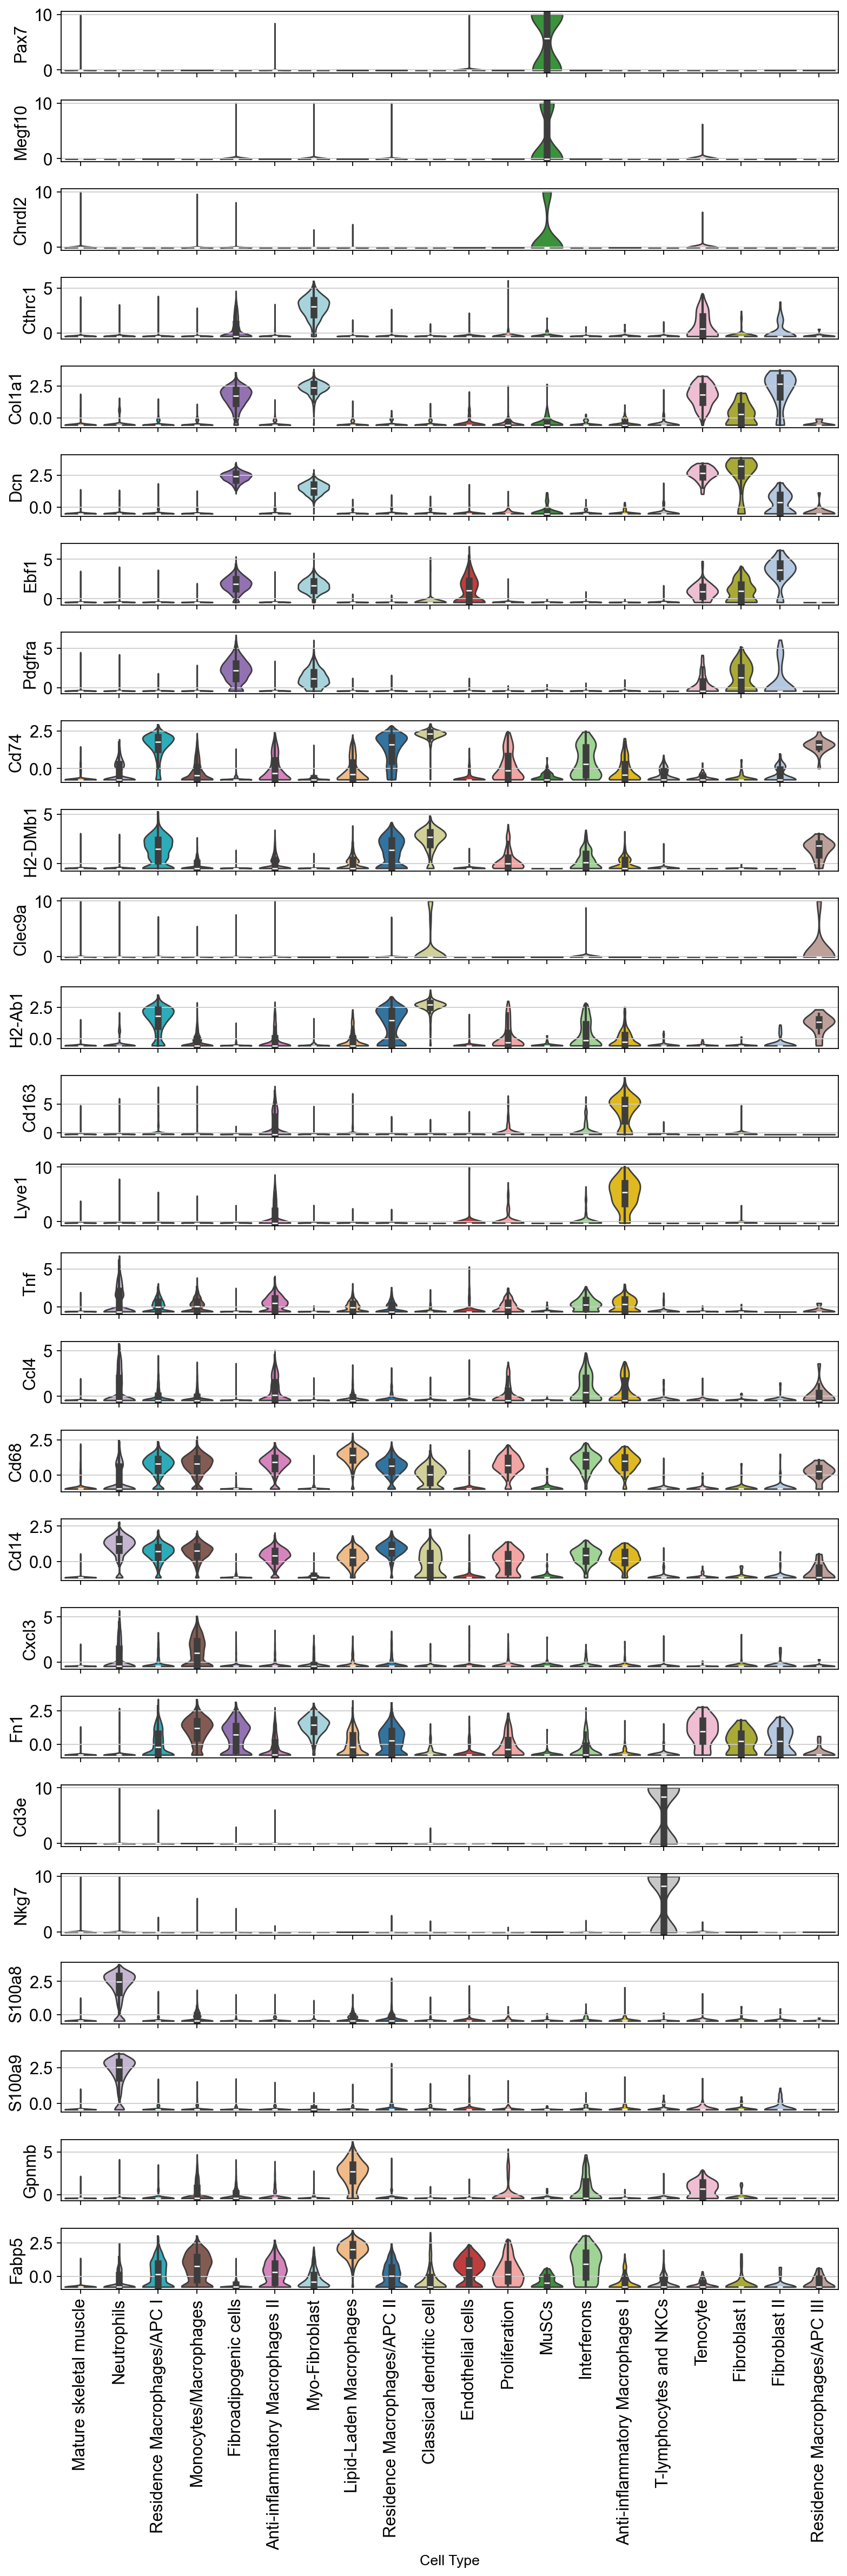

In [34]:

# Specify the gene names for plotting
genes_for_violin = ['Pax7', 'Megf10', 'Chrdl2', 'Cthrc1', 'Col1a1', 'Dcn', 'Ebf1', 'Pdgfra', 'Cd74', 'H2-DMb1', 
                    'Clec9a', 'H2-Ab1', 'Cd163', 'Lyve1', 'Tnf', 'Ccl4','Cd68', 'Cd14', 'Cxcl3', 'Fn1', 'Cd3e', 
                    'Nkg7', 'S100a8', 'S100a9', 'Gpnmb', 'Fabp5']

# Calculate the number of rows needed based on the number of genes
num_rows = len(genes_for_violin)

# Create subplots
fig, axs = plt.subplots(nrows=num_rows, ncols=1, figsize=(10, 30))

# Ensure axs is iterable when num_rows = 1
if num_rows == 1:
    axs = [axs]

# Loop through genes and plot each one
for i, gene in enumerate(genes_for_violin):
    sc.pl.violin(adata, gene, groupby='cell type',  split=False, stripplot=False, rotation=90, 
                 use_raw=False, scale="width", ax=axs[i], show=False, fill=True, inner="box")
    
    # Hide x-axis labels for all but the last plot
    if i != num_rows - 1:
        axs[i].set_xticklabels([])
        axs[i].set_xlabel('')
    else:
        axs[i].set_xlabel('Cell Type', fontsize=12)
        axs[i].tick_params(axis='x', labelrotation=90)  # Rotate x-axis labels
    
    # Access and customize the inner box color
    for patch in axs[i].collections:
        if isinstance(patch, plt.Polygon):  # Check for the inner box (which is a Polygon)
            patch.set_edgecolor('black')  # Set the edge color to black
            patch.set_facecolor('black')  # Set the fill color to black

# Adjust spacing
plt.tight_layout()

# Save the figure
output_path = os.path.join(sc.settings.figdir, "SCDEPLETEDviolinmarker_plot.png")
plt.savefig(output_path, dpi=300)

# Display all plots
plt.show()


In [ ]:
# Set figure parameters
celltypePalette = {
    "Mature skeletal muscle": '#ff7f0e',
    "Neutrophils": '#c5b0d5',
    "Residence Macrophages/APC I": '#17becf',
    "Monocytes/Macrophages": '#8c564b',
    "Fibroadipogenic cells": '#9467bd',
    "Anti-inflammatory Macrophages II": '#e377c2', 
    "Myo-Fibroblast": '#9edae5',
    "Lipid-Laden Macrophages": '#ffbb78',
    "Residence Macrophages/APC II": '#1f77b4',
    "Classical dendritic cell": '#dbdb8d',
    "Endothelial cells": '#d62728',
    "Proliferation": '#ff9896',
    "MuSCs": '#2ca02c',
    "Interferons": '#98df8a',
    "Anti-inflammatory Macrophages I": '#ffcc00',  # Added color code
    "T-lymphocytes and NKCs": '#c7c7c7',
    "Tenocyte": '#f7b6d2',
    "Fibroblast I": '#bcbd22',
    "Fibroblast II": '#aec7e8', 
    "Residence Macrophages/APC III": '#c49c94'
}


In [40]:
# Merged cell type mapping
merged_cell_type = {
    "0": "Mature skeletal muscle",
    "1": "Immune cells",
    "2": "Immune cells",
    "3": "Immune cells",
    "4": "FAPs",
    "5": "Immune cells",
    "6": "FAPs",
    "7": "Immune cells",
    "8": "Immune cells",
    "9": "Immune cells",
    "10": "Endothelial cells",
    "11,0": "Proliferation",
    "11,1": "MuSCs",
    "12": "Interferons",
    "13": "Immune cells",
    "14": "Immune cells",
    "15": "Tenocyte",
    "16": "FAPs",
    "17": "FAPs",
    "18": "Immune cells",
    
}

# Now map the 'leiden_R' column to 'cell type'
adata.obs['cell type'] = adata.obs['leiden_R'].map(merged_cell_type)


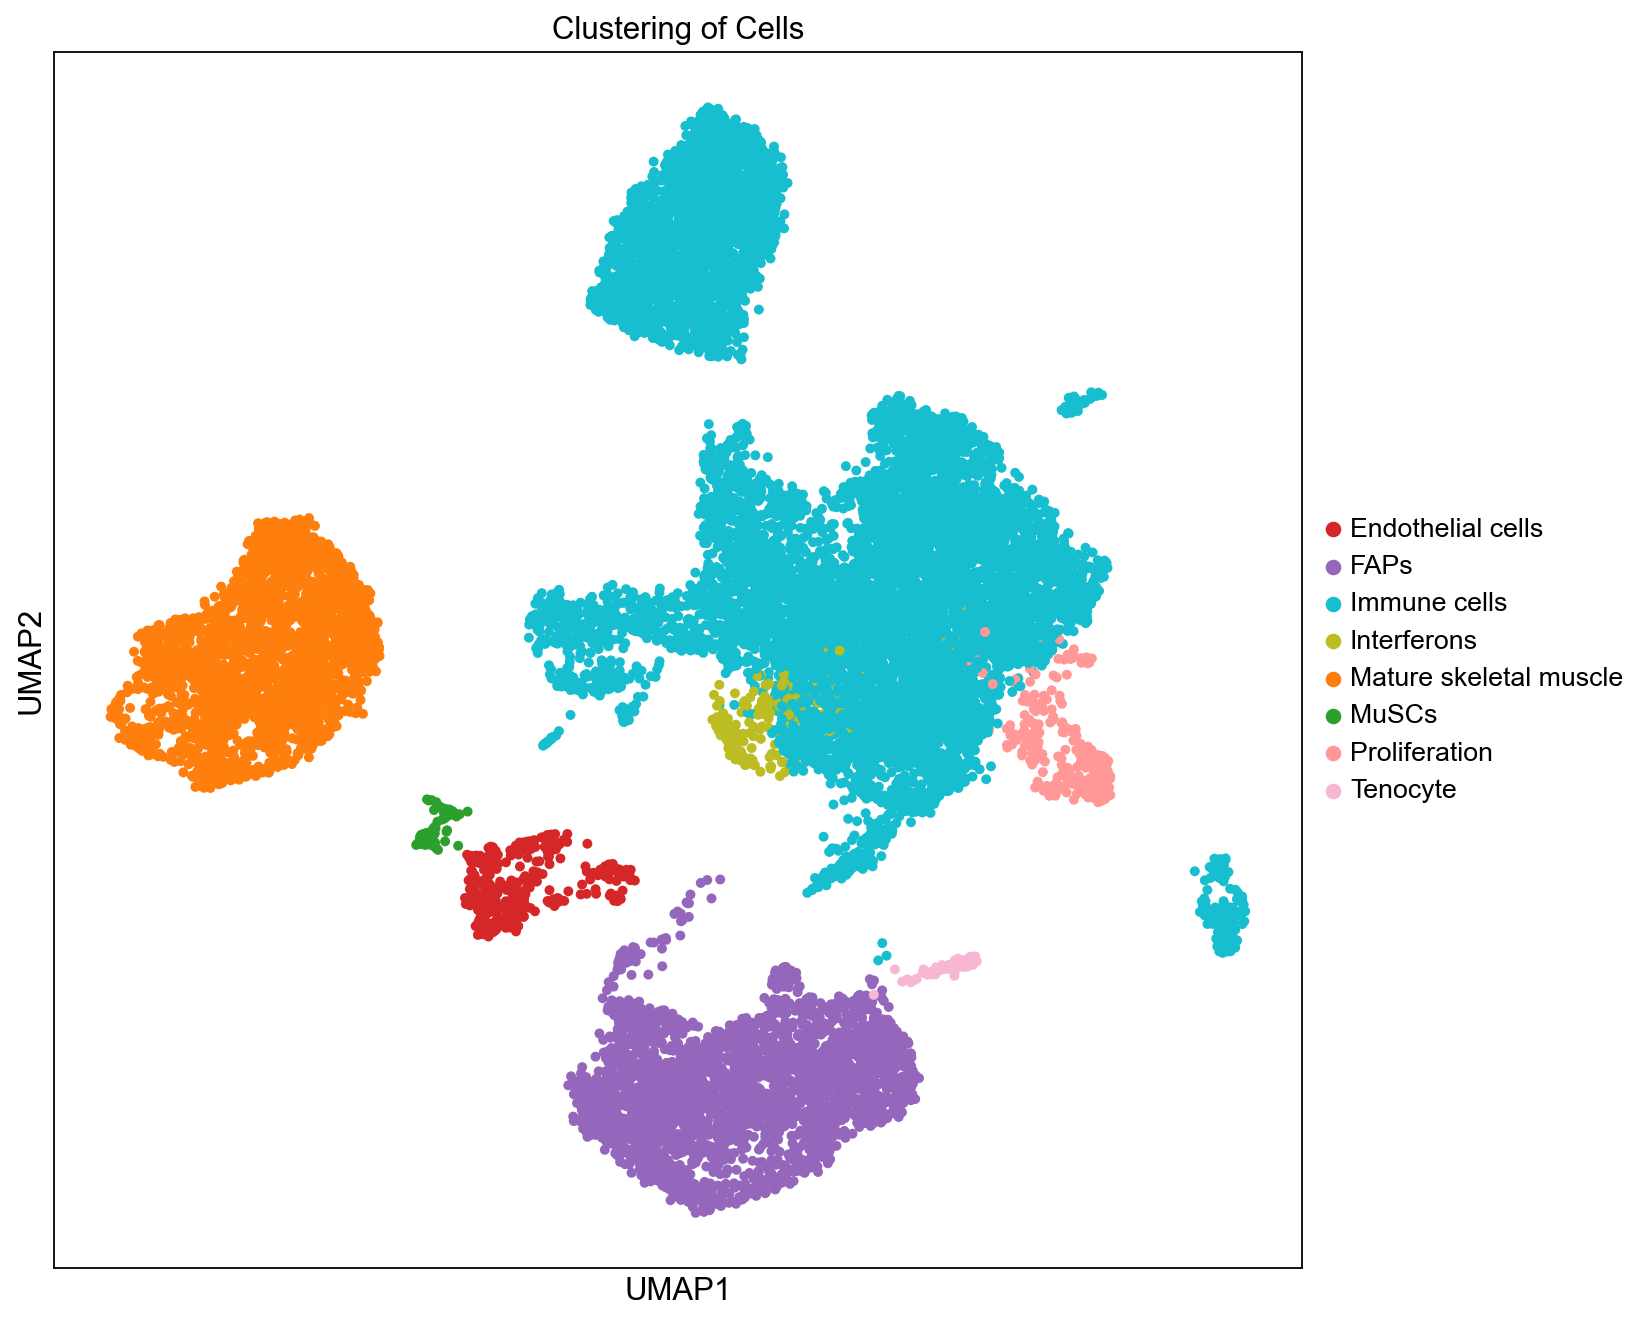

In [41]:
#UMAP plot
sc.set_figure_params(figsize=(10, 10))
img_tag = "_color"  # Specify your image tag here
sc.pl.umap(adata, color=['cell type'],  legend_fontsize=12, legend_fontoutline=2, frameon=True, size=80, title='Clustering of Cells', save=f'umap_plot{img_tag}.png')
plt.show()


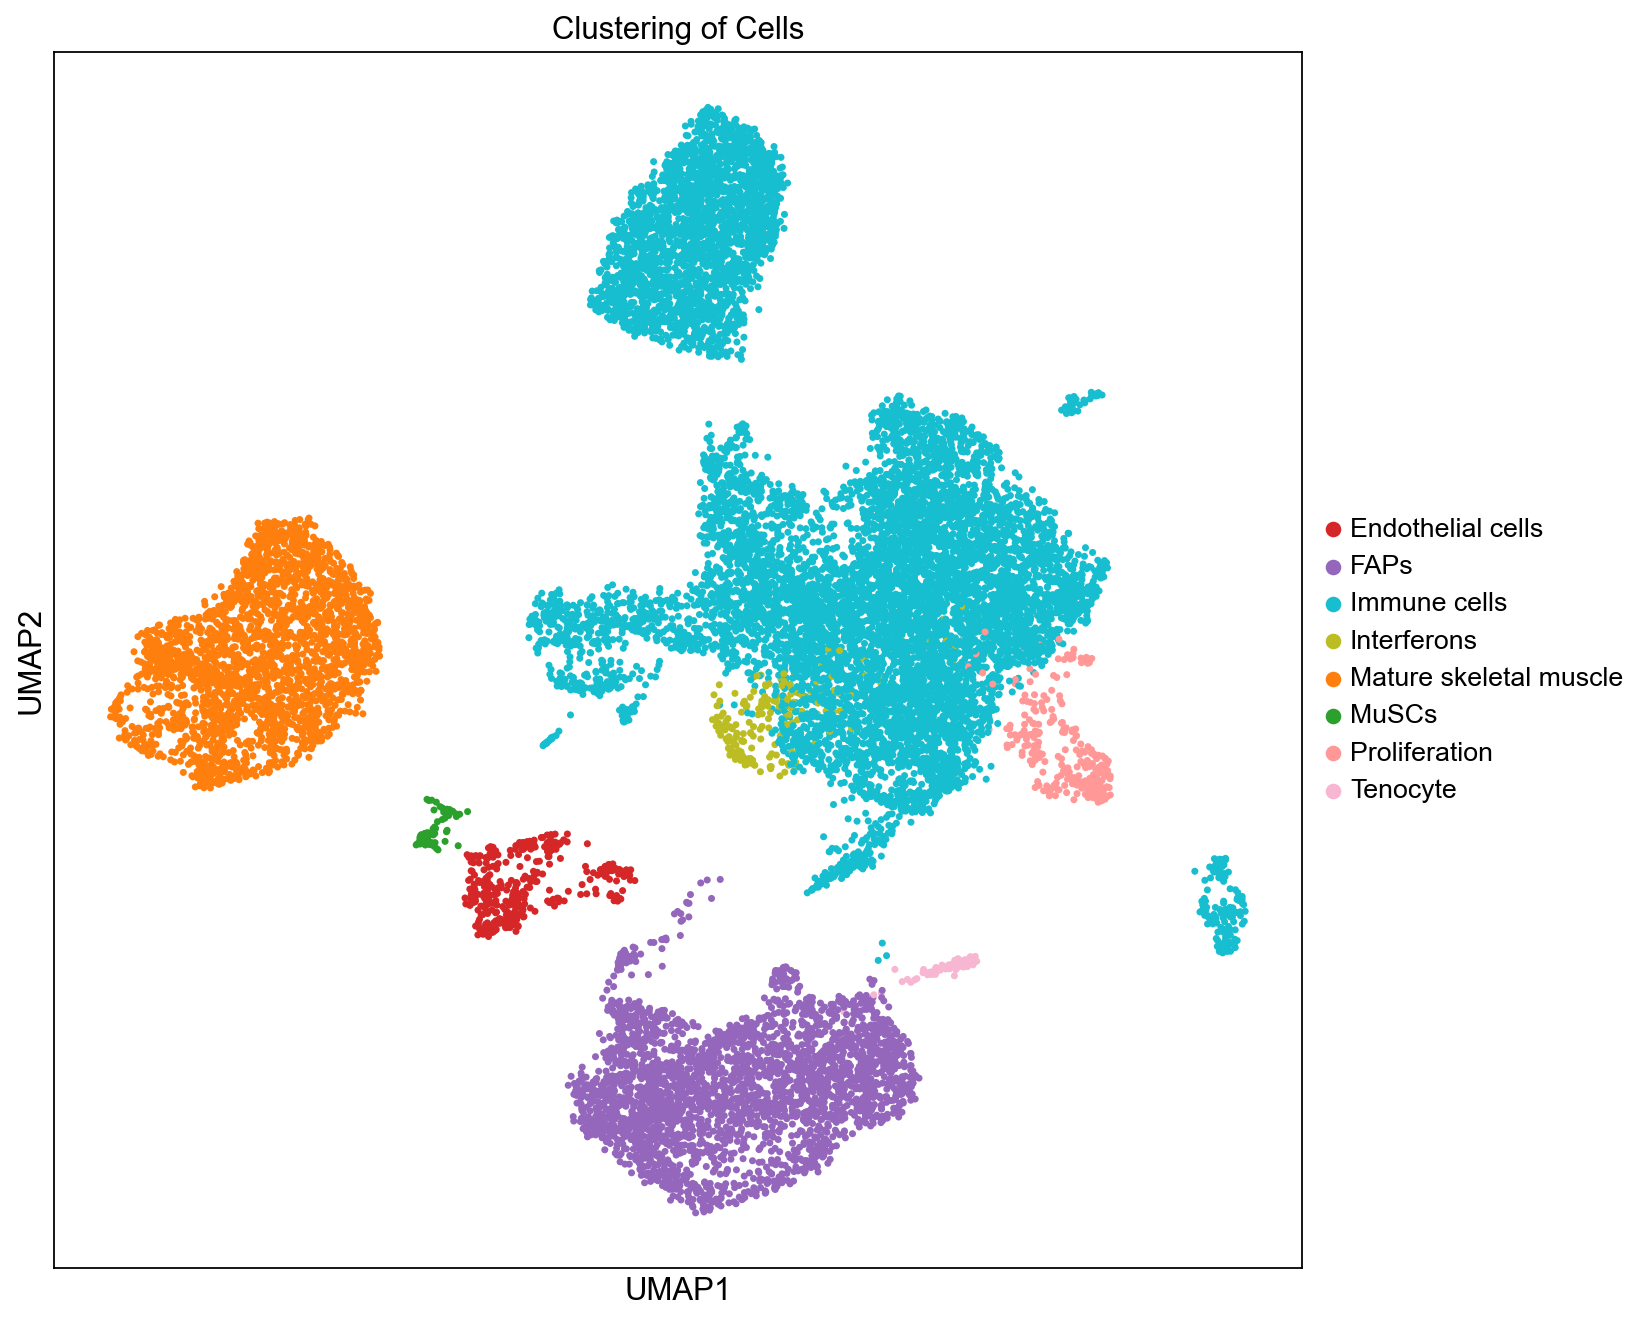

In [42]:
# Set figure parameters
celltypePalette = {
    "FAPs": '#9467bd',
    "Immune cells": '#17becf',
    "Endothelial cells": '#d62728',
    "Mature skeletal muscle": '#ff7f0e', 
    "MuSCs": '#2ca02c', 
    "Interferons": '#bcbd22',
    "Proliferation": '#ff9896',
    "Tenocyte": '#f7b6d2',
    
}

# Set figure parameters
sc.set_figure_params(figsize=(10, 10))

# Plot UMAP with specified color palette for cell types
sc.pl.umap(adata, color='cell type', palette=celltypePalette, legend_fontsize=12, legend_fontoutline=2, frameon=True, size=40, title='Clustering of Cells', save='umap_plot_color.png')
plt.show()


In [49]:
cell_type_counts['cell type'] = cell_type_counts['cell type'].replace({
    "Anti-inflammatory Macrophages II": "Immune cells",
    "Neutrophils": "Immune cells",
    "Residence Macrophages/APC I": "Immune cells",
    "Monocytes/Macrophages": "Immune cells",
    "Lipid-Laden Macrophages": "Immune cells",
    "Residence Macrophages/APC II": "Immune cells",
    "Classical dendritic cell": "Immune cells",
    "Anti-inflammatory Macrophages I": "Immune cells",
    "T-lymphocytes and NKCs": "Immune cells",
    "Residence Macrophages/APC III": "Immune cells",
    "Fibroadipogenic cells": "FAPs",
    "Myo-Fibroblast": "FAPs",
    "Fibroblast I": "FAPs",
    "Fibroblast II": "FAPs",
})


C:\Users\tpsa222\AppData\Local\Temp\ipykernel_11664\207144715.py:1: FutureWarning: The behavior of Series.replace (and DataFrame.replace) with CategoricalDtype is deprecated. In a future version, replace will only be used for cases that preserve the categories. To change the categories, use ser.cat.rename_categories instead.
  cell_type_counts['cell type'] = cell_type_counts['cell type'].replace({


C:\Users\tpsa222\AppData\Local\Temp\ipykernel_11664\4191602027.py:34: FutureWarning: The default value of observed=False is deprecated and will change to observed=True in a future version of pandas. Specify observed=False to silence this warning and retain the current behavior
  stacked_data = filtered_data.pivot_table(index='condition', columns='cell type', values='frequency', fill_value=0)


<Figure size 960x640 with 0 Axes>

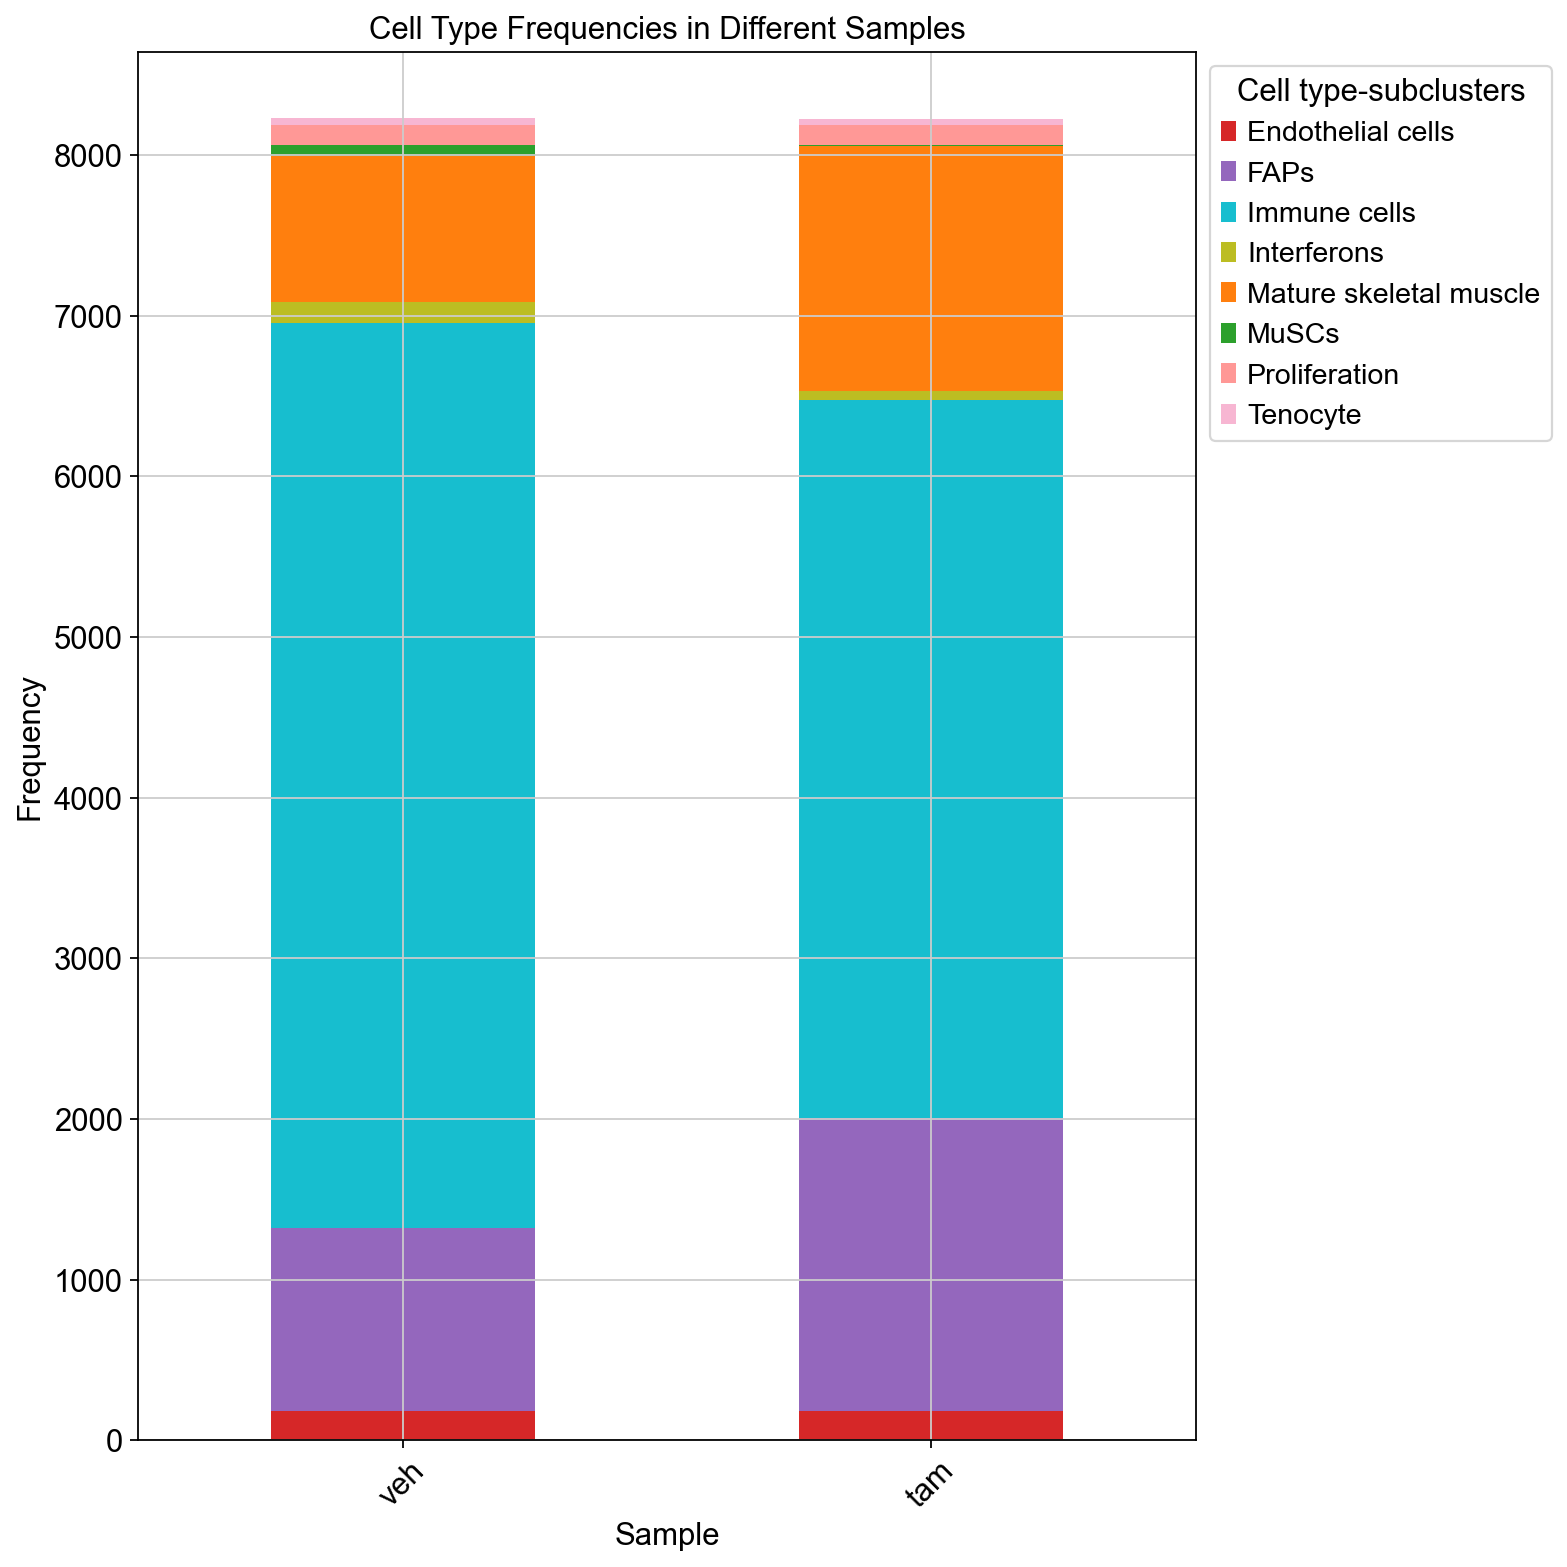

In [55]:
import matplotlib.pyplot as plt
import pandas as pd

celltypePalette = {
    "FAPs": '#9467bd',
    "Immune cells": '#17becf',
    "Endothelial cells": '#d62728',
    "Mature skeletal muscle": '#ff7f0e', 
    "MuSCs": '#2ca02c', 
    "Interferons": '#bcbd22',
    "Proliferation": '#ff9896',
    "Tenocyte": '#f7b6d2',
    
}


# Assuming cell_type_counts is already defined and loaded as a DataFrame
# Filter cell_type_counts to include only relevant columns
cell_type_counts = cell_type_counts[['condition', 'cell type', 'frequency']]

# Set the figure size
plt.figure(figsize=(12, 8))

# Define the order of samples in the plot
sample_order = ['veh', 'tam']

# Ensure the condition column in cell_type_counts is ordered correctly
cell_type_counts['condition'] = pd.Categorical(cell_type_counts['condition'], categories=sample_order, ordered=True)

# Filter data for the specified samples
filtered_data = cell_type_counts[cell_type_counts['condition'].isin(sample_order)]

# Pivot the DataFrame for a stacked bar plot
stacked_data = filtered_data.pivot_table(index='condition', columns='cell type', values='frequency', fill_value=0)

# Sort the index according to the sample_order
stacked_data = stacked_data.reindex(sample_order)

# Create a stacked bar plot with the specified color palette
stacked_data.plot(kind='bar', stacked=True, color=[celltypePalette[col] for col in stacked_data.columns])

# Set plot properties
plt.xticks(rotation=45)  # Keep the x-axis labels horizontal
plt.xlabel('Sample')
plt.ylabel('Frequency')
plt.legend(title='Cell type-subclusters', bbox_to_anchor=(1, 1))  # Move the legend outside the plot area
plt.title('Cell Type Frequencies in Different Samples')
plt.tight_layout()
plt.savefig('bar4_plot.png')
# Show the plot
plt.show()


C:\Users\tpsa222\AppData\Local\Temp\ipykernel_11664\856545550.py:20: FutureWarning: The default of observed=False is deprecated and will be changed to True in a future version of pandas. Pass observed=False to retain current behavior or observed=True to adopt the future default and silence this warning.
  cell_type_counts['normalized_frequency'] = cell_type_counts.groupby('condition')['frequency'].transform(lambda x: x / x.sum())
C:\Users\tpsa222\AppData\Local\Temp\ipykernel_11664\856545550.py:35: FutureWarning: The default value of observed=False is deprecated and will change to observed=True in a future version of pandas. Specify observed=False to silence this warning and retain the current behavior
  stacked_data = filtered_data.pivot_table(index='condition', columns='cell type', values='normalized_frequency', fill_value=0)


<Figure size 960x640 with 0 Axes>

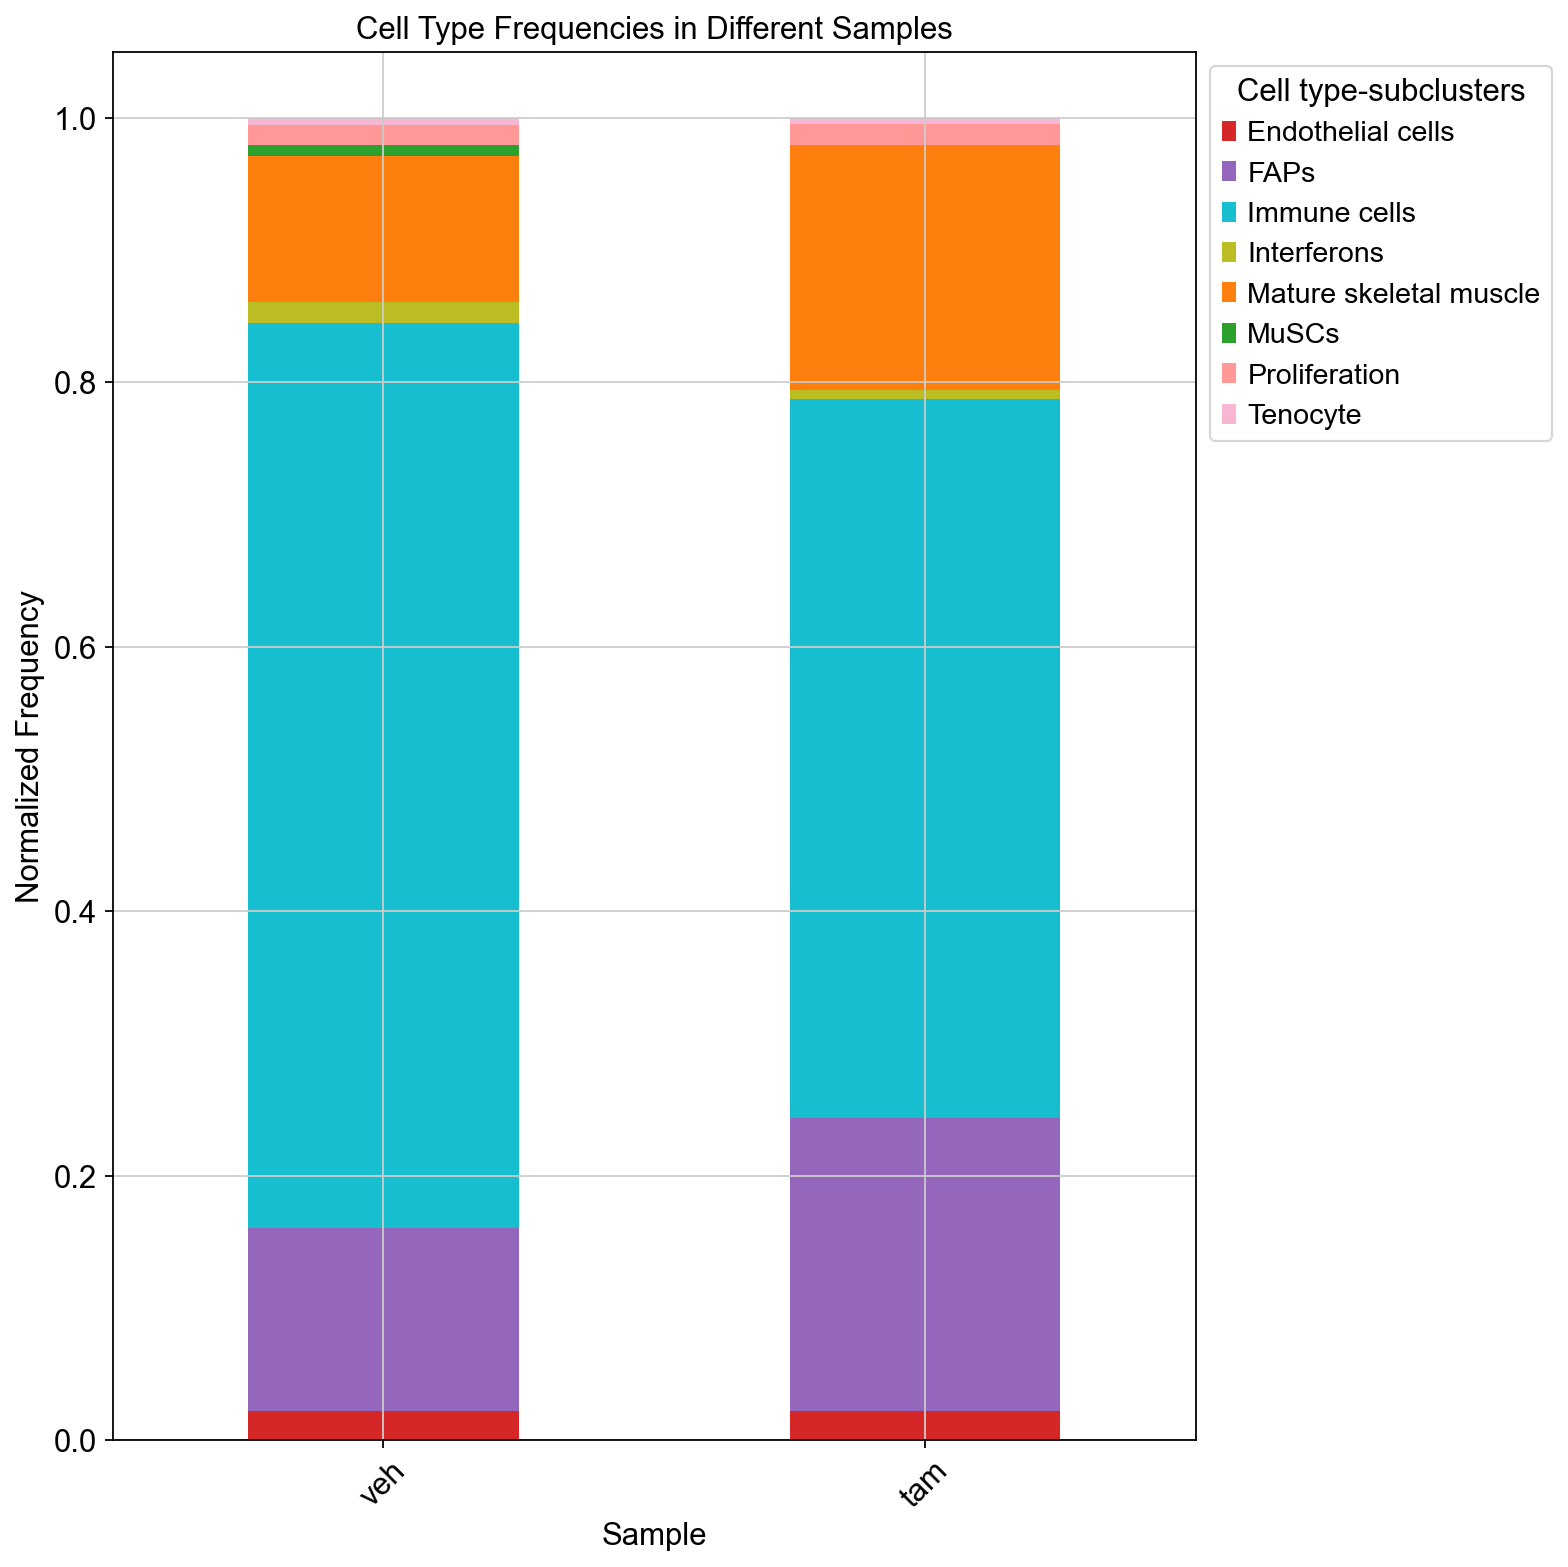

In [56]:
import matplotlib.pyplot as plt
import pandas as pd

celltypePalette = {
    "FAPs": '#9467bd',
    "Immune cells": '#17becf',
    "Endothelial cells": '#d62728',
    "Mature skeletal muscle": '#ff7f0e', 
    "MuSCs": '#2ca02c', 
    "Interferons": '#bcbd22',
    "Proliferation": '#ff9896',
    "Tenocyte": '#f7b6d2',
}

# Assuming cell_type_counts is already defined and loaded as a DataFrame
# Filter cell_type_counts to include only relevant columns
cell_type_counts = cell_type_counts[['condition', 'cell type', 'frequency']]

# Normalize the frequencies by condition (making them proportions)
cell_type_counts['normalized_frequency'] = cell_type_counts.groupby('condition')['frequency'].transform(lambda x: x / x.sum())

# Set the figure size
plt.figure(figsize=(12, 8))

# Define the order of samples in the plot
sample_order = ['veh', 'tam']

# Ensure the condition column in cell_type_counts is ordered correctly
cell_type_counts['condition'] = pd.Categorical(cell_type_counts['condition'], categories=sample_order, ordered=True)

# Filter data for the specified samples
filtered_data = cell_type_counts[cell_type_counts['condition'].isin(sample_order)]

# Pivot the DataFrame for a stacked bar plot
stacked_data = filtered_data.pivot_table(index='condition', columns='cell type', values='normalized_frequency', fill_value=0)

# Sort the index according to the sample_order
stacked_data = stacked_data.reindex(sample_order)

# Create a stacked bar plot with the specified color palette
stacked_data.plot(kind='bar', stacked=True, color=[celltypePalette[col] for col in stacked_data.columns])

# Set plot properties
plt.xticks(rotation=45)  # Keep the x-axis labels horizontal
plt.xlabel('Sample')
plt.ylabel('Normalized Frequency')  # Label to indicate normalization
plt.legend(title='Cell type-subclusters', bbox_to_anchor=(1, 1))  # Move the legend outside the plot area
plt.title('Cell Type Frequencies in Different Samples')
plt.tight_layout()
plt.savefig('bar4_plot.png')
# Show the plot
plt.show()


In [51]:
print("Original cell type counts:")
print(cell_type_counts.groupby('cell type')['frequency'].sum())

adata.obs['cell type'] = adata.obs['leiden_R'].map(merged_cell_type)

print("After merging:")
cell_type_counts = adata.obs.groupby(['condition', 'cell type']).size().reset_index(name='frequency')
print(cell_type_counts.groupby('cell type')['frequency'].sum())


Original cell type counts:
cell type
Mature skeletal muscle    0.295617
Immune cells              1.228155
FAPs                      0.359916
Endothelial cells         0.044364
Proliferation             0.031115
MuSCs                     0.008384
Interferons               0.022847
Tenocyte                  0.009602
Name: frequency, dtype: float64
After merging:
cell type
Endothelial cells           365
FAPs                       2961
Immune cells              10105
Interferons                 188
Mature skeletal muscle     2432
MuSCs                        69
Proliferation               256
Tenocyte                     79
Name: frequency, dtype: int64


C:\Users\tpsa222\AppData\Local\Temp\ipykernel_11664\3704532945.py:2: FutureWarning: The default of observed=False is deprecated and will be changed to True in a future version of pandas. Pass observed=False to retain current behavior or observed=True to adopt the future default and silence this warning.
  print(cell_type_counts.groupby('cell type')['frequency'].sum())
C:\Users\tpsa222\AppData\Local\Temp\ipykernel_11664\3704532945.py:7: FutureWarning: The default of observed=False is deprecated and will be changed to True in a future version of pandas. Pass observed=False to retain current behavior or observed=True to adopt the future default and silence this warning.
  cell_type_counts = adata.obs.groupby(['condition', 'cell type']).size().reset_index(name='frequency')


In [53]:
filtered_data['frequency'] = pd.to_numeric(filtered_data['frequency'], errors='coerce')


In [54]:
print(stacked_data)


cell type  Mature skeletal muscle  Immune cells      FAPs  Endothelial cells  \
condition                                                                      
veh                      0.109964      0.068469  0.034599           0.021993   
tam                      0.185653      0.054347  0.055380           0.022371   

cell type  Proliferation     MuSCs  Interferons  Tenocyte  
condition                                                  
veh             0.015431  0.008141     0.016160  0.005225  
tam             0.015684  0.000243     0.006687  0.004377  


In [45]:
# Create a DataFrame from the 'markers' variable
markers_df = pd.DataFrame(markers)

# Define the full path including the file name and extension
csv_file_path = 'P:/Tolulope/Cellranger Results/Fry-Murach 4d OV aged/markers_outputnew.csv'

# Save the DataFrame to a CSV file
markers_df.to_csv(csv_file_path, index=False)

print(f"Output saved to {csv_file_path}")

Output saved to P:/Tolulope/Cellranger Results/Fry-Murach 4d OV aged/markers_outputnew.csv


In [ ]:
cell_type = {
    "0": "Fibroadipogenic cells",
    "1": "Residence Macrophages/APC",
    "2": "Neutrophils",
    "3": "Pro-inflamatory Macrophages II",
    "4": "Endothelial cells",
    "5": "Monocytes/Macrophages",
    "6": "Mature skeletal muscle",
    "7": "Pro-inflamatory Macrophages I",
    "8": "Lipid-Laden Macrophages",
    "9": "MuSCs and Myoblasts",
    "10": "MuSCs and progenitors",
    "11": "Myo-Fibroblast",
    "11,1": "Proliferation I",
    "12": "Anti-inflammatory Macrophages",
    "13": "Classical Dendritic cells",
    "14":"Pericyte cells",
    "15": "T-lymphocytes and NKCs", 
    "16": "Proliferation",
    "17": "Bcells",
    "18": "Tenocyte",
    "19": "Schwann cells",
   
        
}

In [68]:
adata = sc.read_h5ad('integrated fry.h5ad')
adata

AnnData object with n_obs × n_vars = 16455 × 19304
    obs: 'doublet', 'n_genes', 'n_genes_by_counts', 'total_counts', 'total_counts_mt', 'pct_counts_mt', 'total_counts_ribo', 'pct_counts_ribo', 'total_counts_hb', 'pct_counts_hb', 'Sample', 'leiden', 'cell type', 'condition', 'leiden_R'
    var: 'n_cells', 'highly_variable', 'means', 'dispersions', 'dispersions_norm', 'highly_variable_nbatches', 'highly_variable_intersection', 'mean', 'std'
    uns: 'Sample_colors', 'cell type_colors', 'hvg', 'leiden', 'leiden_R_colors', 'leiden_colors', 'log1p', 'neighbors', 'pca', 'umap'
    obsm: 'X_pca', 'X_umap'
    varm: 'PCs'
    layers: 'counts'
    obsp: 'connectivities', 'distances'

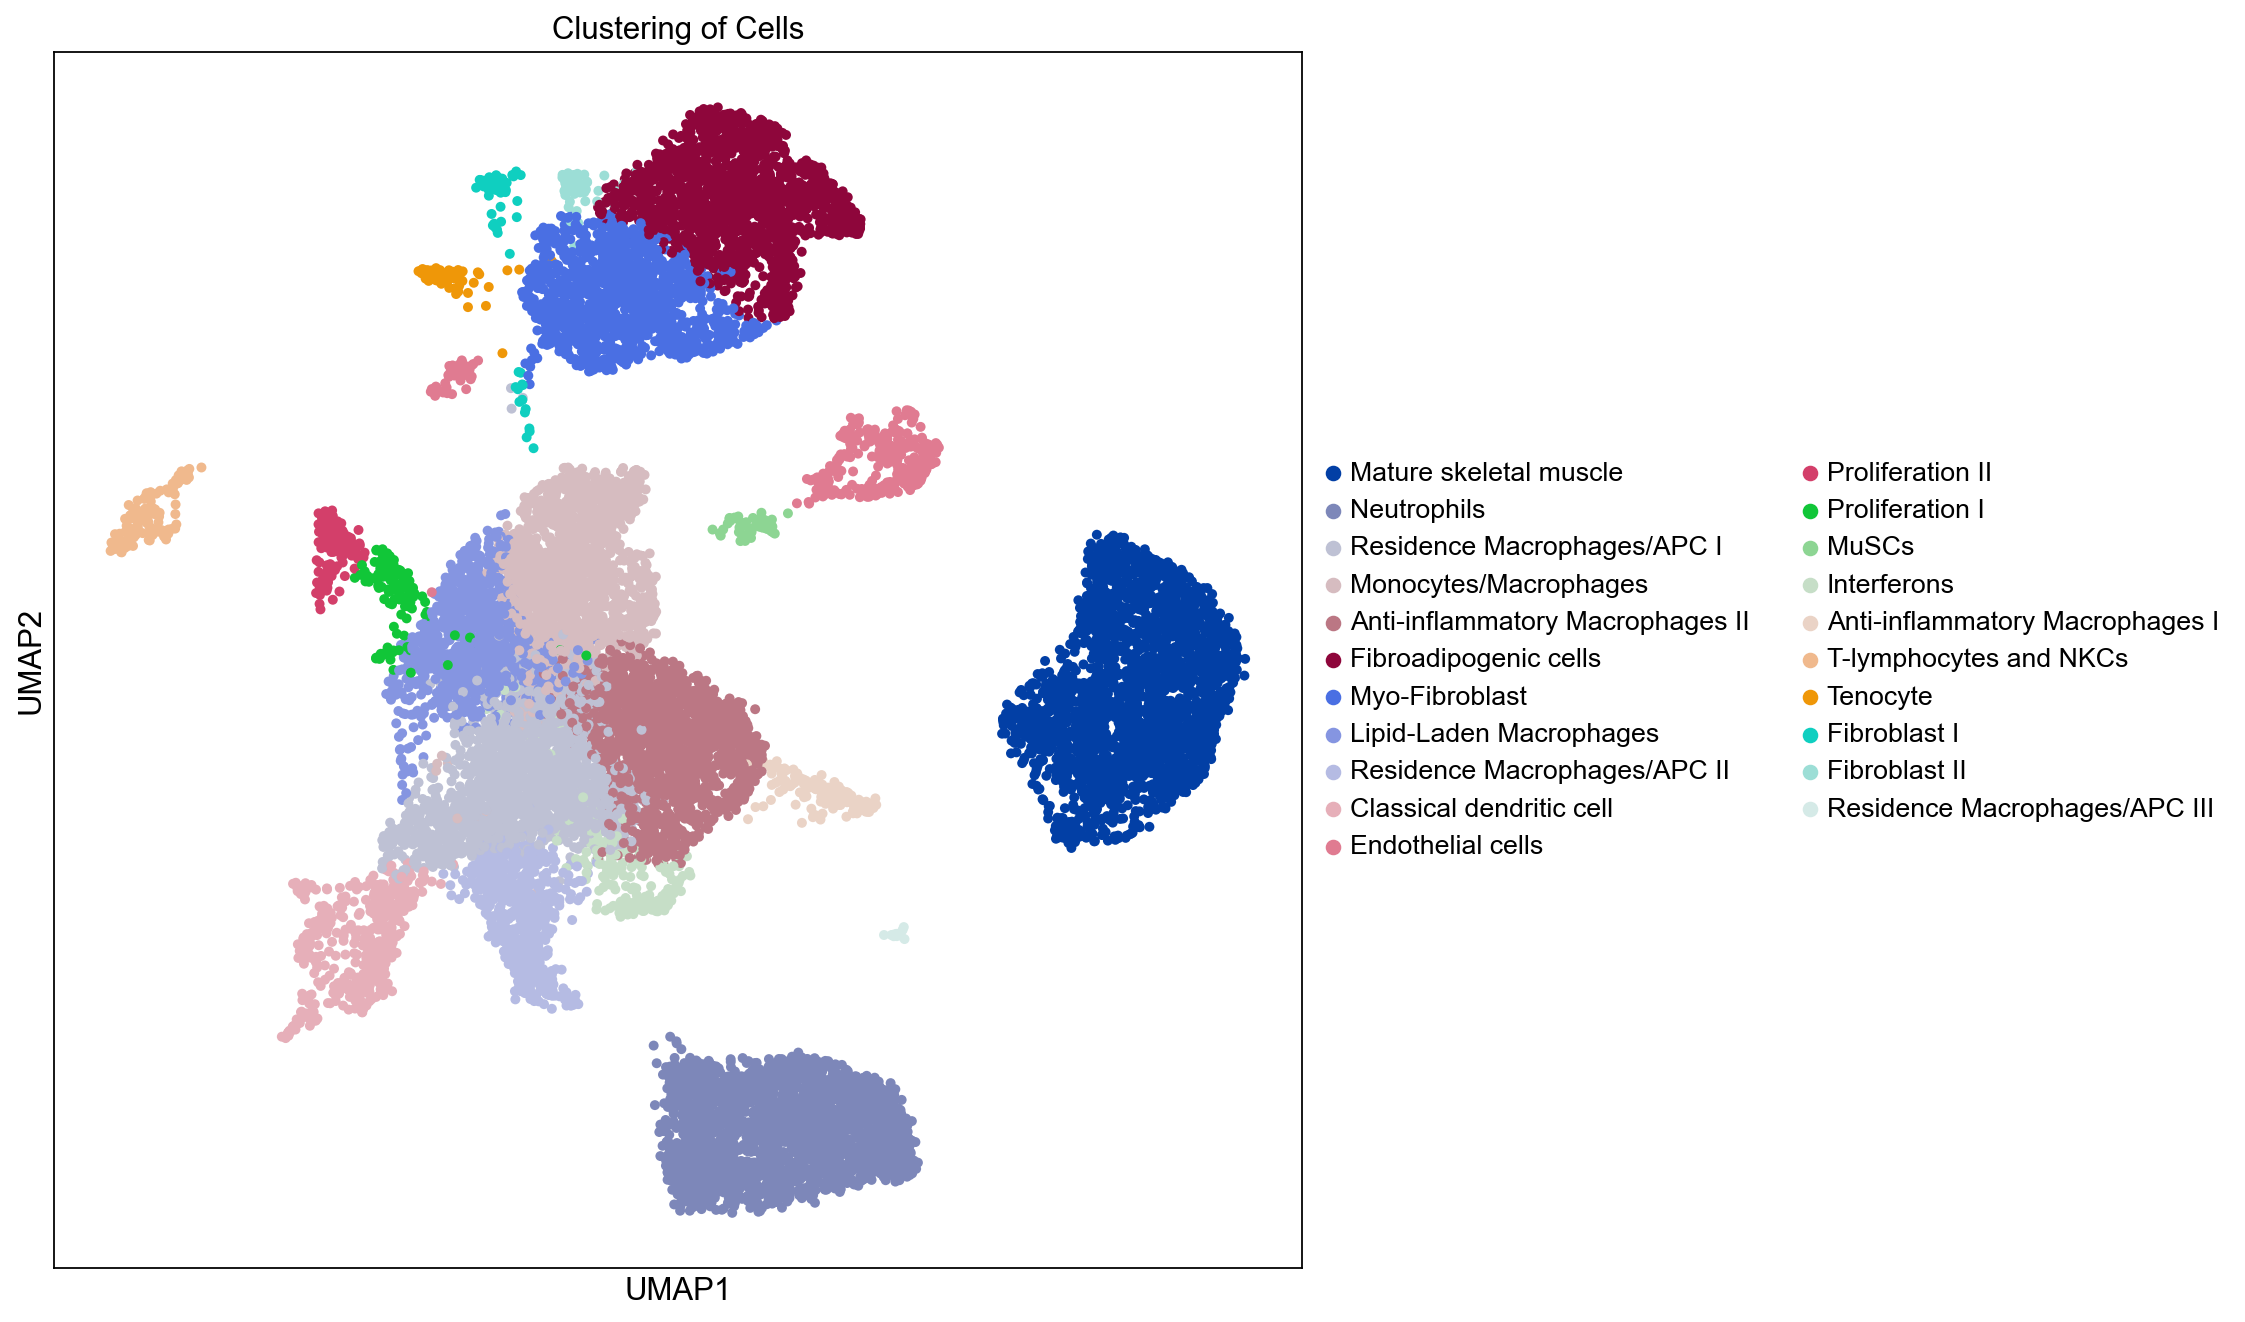

In [73]:
#UMAP plot
sc.set_figure_params(figsize=(10, 10))
img_tag = "_color"  # Specify your image tag here
sc.pl.umap(adata, color=['cell type'],  legend_fontsize=12, legend_fontoutline=2, frameon=True, size=80, title='Clustering of Cells', save=f'umap_plot{img_tag}.png')
plt.show()


In [76]:
# First, check which column contains the correct cell type information
# Let's try using the column 'cell type' first
cell_type_column = 'cell type'

# Retrieve the unique clusters and their corresponding cell types
cell_type_cluster_mapping = adata.obs[['leiden', cell_type_column]].drop_duplicates()

# Convert to a dictionary format with cluster as the key and cell type as the value
cell_type_dict = dict(zip(cell_type_cluster_mapping['leiden'], cell_type_cluster_mapping[cell_type_column]))

# Print the mapping in a readable format
print("cell_type = {")
for cluster, cell_type in cell_type_dict.items():
    print(f'    "{cluster}": "{cell_type}",')
print("}")


cell_type = {
    "15": "Tenocyte",
    "10": "Endothelial cells",
    "11,2": "MuSCs",
    "8": "Residence Macrophages/APC II",
    "2": "Residence Macrophages/APC I",
    "7": "Lipid-Laden Macrophages",
    "12": "Interferons",
    "0": "Mature skeletal muscle",
    "11,1": "Proliferation I",
    "3": "Monocytes/Macrophages",
    "5": "Fibroadipogenic cells",
    "4": "Anti-inflammatory Macrophages II",
    "16": "Fibroblast I",
    "13": "Anti-inflammatory Macrophages I",
    "1": "Neutrophils",
    "9": "Classical dendritic cell",
    "6": "Myo-Fibroblast",
    "14": "T-lymphocytes and NKCs",
    "11,0": "Proliferation II",
    "18": "Residence Macrophages/APC III",
    "17": "Fibroblast II",
}


In [77]:
# Check the count of each cell type in the 'leiden' clusters
cell_type_count = adata.obs.groupby('leiden')['cell_type'].value_counts()

# Display the results
print(cell_type_count)


leiden  cell_type
0       Unknown      2432
1       Unknown      2416
2       Unknown      1780
3       Unknown      1679
4       Unknown      1654
5       Unknown      1603
6       Unknown      1236
7       Unknown      1110
8       Unknown       639
9       Unknown       486
10      Unknown       365
11,0    Unknown       137
11,1    Unknown       119
11,2    Unknown        69
12      Unknown       195
13      Unknown       167
14      Unknown       149
15      Unknown        79
16      Unknown        72
17      Unknown        50
18      Unknown        18
Name: count, dtype: int64
